#Title: Sentiment Analysis on Amazon Product Reviews

Student: Jiali Han

Academic Year: Fall 2023

Instructor: Dr. Kenneth Church

Teaching Assistant: Ferran Sulaiman

## Project Objective:
The primary objective of this project is to design and develop an effective sentiment analysis model tailored for Amazon product reviews in food category. It focuses on adapting a sophisticated, pre-trained language model `DistilBERT` to the specific domain of Amazon reviews, aiming to accurately determine the overall sentiment polarity (positive, negative, neutral) of customers reviews. This approach leverages the advanced capabilities of `DistilBERT` while tailoring it to the nuances and context of a particular dataset, which is essential for effective sentiment analysis and will provide valuable insights for sellers and buyers, enhancing their understanding of market trends and consumer preferences.

## Project Introduction:
With the vast amount of consumer feedback available online, particularly on platforms like Amazon, there's a growing need for advanced tools capable of analyzing and interpreting the sentiment behind these reviews. This project addresses this need by focusing on the development of a sentiment analysis model using state-of-the-art NLP techniques and machine learning models.

The approach involves a comprehensive exploration of various models, ranging from simpler ones like Naive Bayes and Logistic Regression to more sophisticated models like LSTM, CNN, BERT, and RoBERTa. Emphasis is placed on selecting the most effective pre-trained model suitable for fine-tuning, considering the computational resources available in Google Colab and the NEU Discovery Cluster.

The project encompasses several phases, including data collection, preprocessing, model training, testing, evaluation, and fine-tuning. It also incorporates an in-depth study of sentiment analysis methodologies, leveraging resources from platforms like YouTube, Bilibili, and GitHub. The data collection focuses on a specific product category, ensuring the dataset is large and diverse enough to train a robust model.

This independent project, undertaken in the context of the CS6120 Natural Language Processing course, not only aims to develop a practical tool for sentiment analysis but also serves as a significant learning endeavor in the field of NLP.

# Setup Environment

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov 28 06:10:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## Log into HuggingFace

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

## Set up Directories

In [ ]:
from pathlib import Path  # Object-oriented filesystem paths

DATA = Path("./archive-amazon")

# Create the directory if it doesn't exist
DATA.mkdir(parents=True, exist_ok=True)

assert DATA.is_dir()  # This should now pass if the directory was successfully created

IMG = Path("./images")

# Create the directory if it doesn't exist
IMG.mkdir(parents=True, exist_ok=True)

assert IMG.is_dir()

# Import Libraries

## PIP install

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install accelerate --upgrade

## Standard Libararies

In [ ]:
# Standard libraries for data manipulation and regular expressions

import re  # Regular expressions for string searching and manipulation
import numpy as np  # Fundamental package for scientific computing in Python
import pandas as pd  # Data analysis and manipulation tool

## Data visualization

In [ ]:
# Data visualization libraries

import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Advanced data visualization based on matplotlib
import wordcloud  # Tool for creating word cloud images
from wordcloud import WordCloud  # Specific class for generating word clouds
import plotly.graph_objs as go  # Interactive and complex visualizations with Plotly
import plotly.express as px  # High-level interface for data exploration using Plotly
from plotly.offline import iplot  # Interactive Plotly graphs in offline mode

## Scikit-learn Modules

In [ ]:
# Scikit-learn modules for machine learning tasks

from sklearn import decomposition  # Matrix decomposition and factor analysis
from sklearn import ensemble  # Ensemble methods for combining predictions
from sklearn import feature_extraction  # Extracting features from raw data
from sklearn import linear_model  # Linear modeling techniques
from sklearn import metrics  # Tools to evaluate model performance
from sklearn import model_selection  # Data splitting and parameter tuning
from sklearn import naive_bayes  # Implementations of Naive Bayes algorithms
from sklearn import pipeline  # Pipeline creation for sequential processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text to vector conversion
from sklearn.metrics import classification_report  # Detailed classification metrics
from sklearn.metrics import accuracy_score # To compute accurary of a classification model
from sklearn.metrics import recall_score # To compute recall of a classification model
from sklearn.metrics import precision_score # To compute precision of a classification model
from sklearn.metrics import f1_score # To compute f1 score of a classification model
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.manifold import TSNE  # t-SNE for non-linear dimensionality reduction
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.model_selection import train_test_split # Split dataset into different uses

## NLP Libraries

In [ ]:
# Natural Language Processing libraries

import gensim  # Unsupervised topic modeling and natural language processing
import gensim.downloader as gensim_api  # Downloading pre-trained models and data
import nltk  # Natural Language Toolkit for processing and analyzing human language data
from nltk.tokenize import word_tokenize  # Tokenizing strings into words

In [ ]:
# Download the 'stopwords' dataset from NLTK for natural language processing tasks
nltk.download('stopwords')

# Label words in a text (corpus) as nouns, verbs, adjectives, etc.
nltk.download('averaged_perceptron_tagger')

# Download the 'punkt' tokenizer models from NLTK for sentence or word tokenization
nltk.download('punkt')

# Identify and classify proper nouns in text, named entity recognition (NER)
nltk.download('maxent_ne_chunker')

# Downloads a large word list
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Additional utilities

from tqdm.notebook import tqdm  # Progress bars for Jupyter Notebooks
from imblearn.under_sampling import RandomUnderSampler  # Under-sampling technique for balancing datasets

## Transformers Libraries

In [ ]:
from transformers import (
    BertModel,
    BertTokenizer,
    DistilBertModel,
    DistilBertTokenizer,
    DistilBertTokenizerFast,
    DataCollatorWithPadding,
    AutoTokenizer,
    TrainingArguments, Trainer
)

import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import os
from torch.utils.data import Dataset

## Setup

In [ ]:
from tqdm.notebook import tqdm
# Set the style of Seaborn plots to 'darkgrid' for better visibility
sns.set_style("darkgrid")

# Set the context of Seaborn plots to 'notebook' for optimal display in Jupyter Notebooks
sns.set_context("notebook")

# Enable progress bars for Pandas operations with tqdm
tqdm.pandas()

# Load data from HuggingFace

This dataset was previously uploaded by myself for efficient use.

Check this link for detailed info: https://huggingface.co/datasets/jhan21/amazon-food-reviews-dataset

**About Dataset**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Data includes:**

Reviews from Oct 1999 - Oct 2012
568,454 reviews
256,059 users
74,258 products
260 users with > 50 reviews

**Data Fields**

* ProductId: Unique identifier for the product

* UserId: Unique identifier for the user

* ProfileName: Profile name of the user

* HelpfulnessNumerator: Number of users who found the review helpful

* HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

* Score: Rating between 1 and 5

* Time: Timestamp of the review

* Summary: Brief summary of the review

* Text: Text of the review

In [ ]:
from datasets import load_dataset

dataset = load_dataset("jhan21/amazon-food-reviews-dataset")

dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Convert the 'train' split to a Pandas DataFrame
df = dataset['train'].to_pandas()

# Display the first few rows of the DataFrame
df

# Pre-process the data and EDA (Exploratory Data Analysis)

In [ ]:
df.shape

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,sentiment_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,positive


**Data observation**: Contains product Ids, users, and review information

**Data we will be used in this project:**
- Summary: Review summary proposed by the customer
- Text: Complete product review by the customer
- Score: The product rating provided by the customer

### Data cleaning

To streamline the dataset for this NLP project and enhance computational efficiency, I decided to remove columns with duplicate parameters and discarded those that are irrelevant to our analysis.

In [ ]:
# Remove duplicate entries from dataframe
cleaned_df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
cleaned_df.shape

In [ ]:
# Drop UserId, Score, profileName, HelpfulnessNumerator, HelpfulnessDenominator, columns
df = cleaned_df.drop(['UserId',
                      'ProductId',
                      'Time',
                      'ProfileName',
                      'HelpfulnessNumerator',
                      'HelpfulnessDenominator',
                      'Summary'], axis=1)
df.head()

### Sentiment Classification

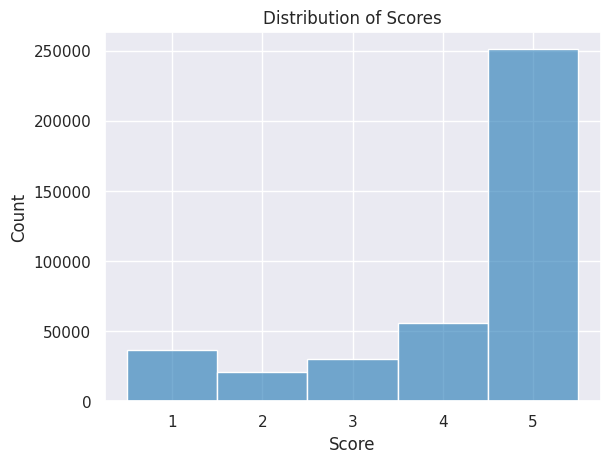

In [ ]:
sns.histplot(df, x="Score", alpha=0.6, discrete=True)
plt.title("Distribution of Scores")
plt.show()

**Data observation**: Most of the customer rating is positive.

**Convert the 5-classes rating in 3-classes sentiment as a target variable**

**Design Choice:**

- Classify positive reviews as +1
- Classify neutral reviews as 0
- Classify negative reviews as -1
- Use rating value 3 as threshold

**Reasons behind:**

- To simplify analysis: The primary interest in this project is to understand whether the sentiment is positive, negative, or neutral, rather than distinguishing between different levels of positive or negative sentiment.

- To handle imbalanced bata: I learned that in many real-world datasets certain classes (like middle ratings) are underrepresented. This imbalance can lead to poor performance of machine learning models. Thus, I decided to classify into fewer classes to help mitigate this issue.

- To focus on sentiment polarity: The main goal in our sentiment analysis is to capture the overall sentiment polarity. Ratings like 1 and 2 clearly indicate negative sentiment, 4 and 5 indicate positive sentiment, while 3 can be considered neutral. This aligns more closely with common sentiment analysis objectives.

- To improve model performance: I learned from Youtube tutorial that fewer classes can lead to clearer distinctions for the model to learn, potentially improving its performance, especially in more complex datasets.


In [ ]:
def convert_rating(rating, threshold=3):
    if rating > threshold:
        return 1
    if rating < threshold:
        return -1
    return 0

In [ ]:
df["sentiment"] = df.Score.map(convert_rating)

In [ ]:
df

,Id,Score,Summary,Text,sentiment
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...
568449,568450,5,Will not do without,Great for sesame chicken..this is a good if no...,1
568450,568451,2,disappointed,I'm disappointed with the flavor. The chocolat...,-1
568451,568452,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


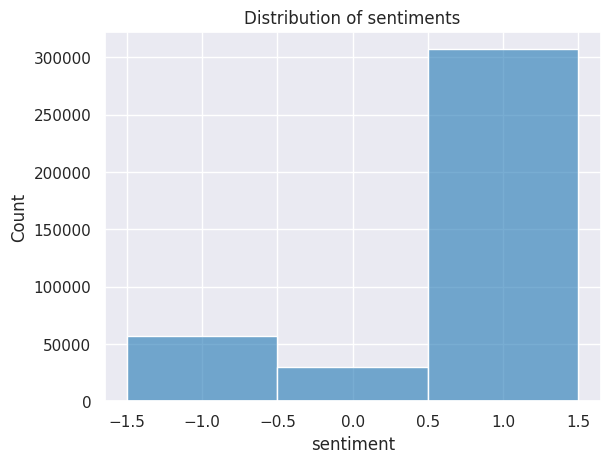

In [ ]:
sns.histplot(df, x="sentiment", alpha=0.6, discrete=True)
plt.title("Distribution of sentiments")
plt.show()

In [ ]:
df["sentiment_text"] = df.sentiment.replace({-1: "negative", 0: "neutral", 1: "positive"})
df.head()

,Id,Score,Text,sentiment,sentiment_text
0,1,5,I have bought several of the Vitality canned d...,1,positive
1,2,1,Product arrived labeled as Jumbo Salted Peanut...,-1,negative
2,3,4,This is a confection that has been around a fe...,1,positive
3,4,2,If you are looking for the secret ingredient i...,-1,negative
4,5,5,Great taffy at a great price. There was a wid...,1,positive


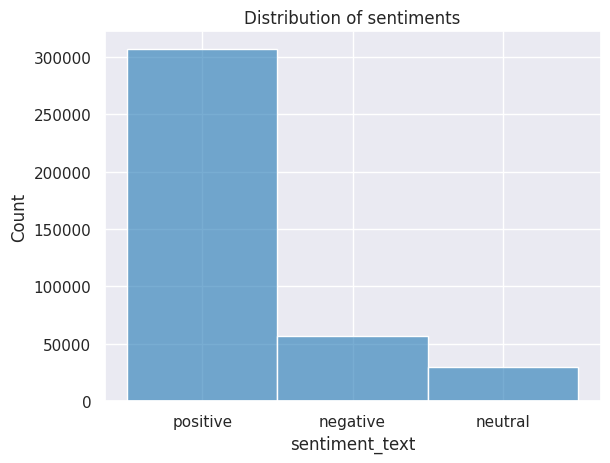

In [ ]:
sns.histplot(df,x="sentiment_text",alpha=0.6,discrete=True)
plt.title("Distribution of sentiments")
plt.show()

## Data Visual Representations

**Create word clouds as visual representations of the 3 different sentiments**

**Reasons behind:**
- To identify key themes and terms that are prominent in positive and negative reviews.

- To gain insights into what factors or attributes are most associated with positive and negative sentiments

- To see if data needs further preprocessing steps. e.g. if there are irrelevant words in word clouds, it might indicate the need for more thorough cleaning or preprocessing of your text data (like removing stop words, handling misspellings...)

**Reference:**
https://youtu.be/cF0UJPjcdqQ?si=gGPPsPMa3FPpmgwW

In [ ]:
# Create a set of stopwords that are in either the wordcloud or NLTK libraries but not in both
diff_stopwords = set(wordcloud.STOPWORDS) ^ set(nltk.corpus.stopwords.words("english"))
# Print the number of unique stopwords found in this differential set
print(len(diff_stopwords))

# Create a combined set of stopwords from both wordcloud and NLTK libraries
stopwords = set(wordcloud.STOPWORDS) | set(nltk.corpus.stopwords.words("english"))
# Update the combined stopwords set with additional words specific to your needs
stopwords.update(["br", "href"])

# Print the total number of stopwords in the combined set
print(len(stopwords))


83
229


**Word Cloud for Positive Sentiment**

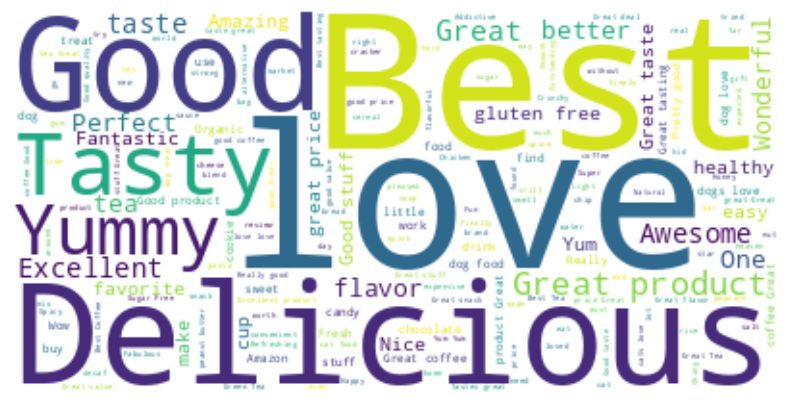

In [ ]:
positive_df = df[df.sentiment == 1]

pos_wordcloud = WordCloud(stopwords=stopwords,background_color="white",)\
               .generate(" ".join(positive_df.Summary.dropna()))

plt.figure(figsize=(10,5))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(IMG / "positive_wordcloud.png")
plt.show()

**Word Cloud for Neutral Sentiment**

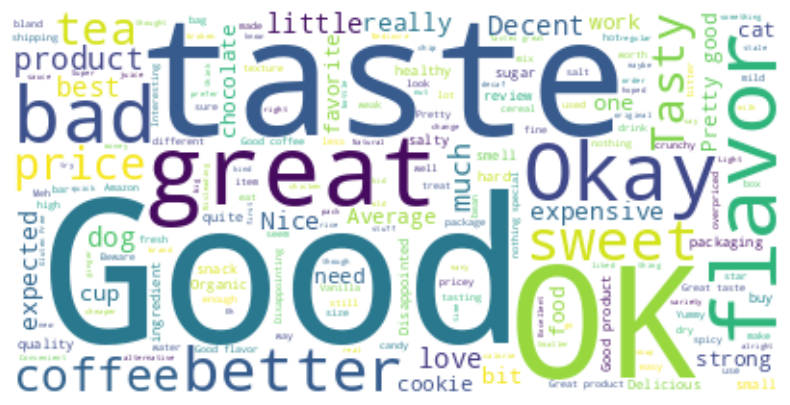

In [ ]:
neutral_df = df[df.sentiment == 0]

neu_wordcloud = WordCloud(stopwords=stopwords,background_color="white",)\
               .generate(" ".join(neutral_df.Summary.dropna()))

plt.figure(figsize=(10,5))
plt.imshow(neu_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(IMG / "neutral_wordcloud.png")
plt.show()

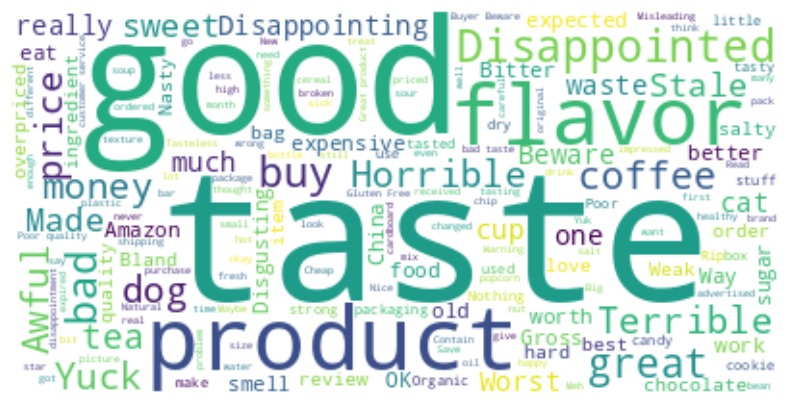

In [ ]:
negative_df = df[df.sentiment == -1]

neg_wordcloud = WordCloud(stopwords=stopwords,background_color="white",)\
               .generate(" ".join(negative_df.Summary.dropna()))

plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(IMG / "negative_wordcloud.png")
plt.show()

**Word Cloud Observations:**

Positive sentiment words: love, Best, good, Delicious, great...

Neutral sentiment words: taste, OK, good, great, Okay...

Negative sentiment words: taste, good, flavor, disappointed...


**Interesting findings:**

The word *good* appears in the neutral and negative sentiment word clouds, despite being a positive word.

My guess:
1. The meaning of "good" can vary depending on the context in which it is used. For example, "good" can also mean a tangible or physical product that someone will buy. But in this case, good doesn't mean having the qualities required for a particular role.

2. In some cases, "good" might be used in a sentence like "The product was not good" which is a context that might is not eositive. Similarly, "good" in a neutral context ("The product was good, nothing special") doesn't convey strong positivity.

3. I could imagine that some people also would use "good" in an ironical way in negative reviews. For example, a review might say, "Good job on making the worst product I've ever used." Here, "good" is used negatively.

In a word, even though Word clouds can show the frequency of words, they do not capture the context or sentiment. Thus, a word that generally has a positive connotation might appear frequently in negative or neutral contexts, but this nuance is lost in a word cloud.

## Additional data preprocessing (not for fine-tune task)

For traditional models, I did some additional data preprocessing for columns 'Summary' and 'Text' and stored the processing results in `copied_df`.

These additional data processing steps include:

1. remove all html tags
2. convert letters into lowercase
3. remove punctuations
4. remove URLS
5. correct incorrect spelling
6. remove stop words (storing in a new dataframe)

By doing so, we aim to only focus on relevant words, reduce the dimensionality of the feature space, make computational processing more efficient, and give terms that carry sentiment more weight.

In [ ]:
copied_df = df.copy()
copied_df.head()

,Id,Score,Text,sentiment
0,1,5,I have bought several of the Vitality canned d...,1
1,2,1,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,4,This is a confection that has been around a fe...,1
3,4,2,If you are looking for the secret ingredient i...,-1
4,5,5,Great taffy at a great price. There was a wid...,1


In [ ]:
copied_df['Text'] = copied_df['Text'].astype(str)

In [ ]:
def remove_tags(string):
    result = str(re.sub('<.*?>','',string))
    return result

# remove html tags in 'Text'
copied_df['Text']=copied_df['Text'].apply(lambda cw : remove_tags(cw))
copied_df.head(1)

,Id,Score,Text,sentiment
0,1,5,I have bought several of the Vitality canned d...,1


In [ ]:
# convert to lowercase
copied_df['Text'] = copied_df['Text'].apply(str.lower)
copied_df.head(1)

,Id,Score,Text,sentiment
0,1,5,i have bought several of the vitality canned d...,1


In [ ]:
# Removing Punctuation
import string
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text =text.replace(char,"")
    return text

copied_df['Text']=copied_df['Text'].apply(lambda cw : remove_punc(cw))
copied_df.head(1)

,Id,Score,Text,sentiment
0,1,5,i have bought several of the vitality canned d...,1


In [ ]:
# remove urls
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

# Apply the function to the 'text' column
copied_df['Text'] = copied_df['Text'].apply(lambda cw : remove_urls(cw))
copied_df.head(1)

,Id,Score,Text,sentiment
0,1,5,i have bought several of the vitality canned d...,1


For the rationale behind customizing the stop words set for sentiment analysis, I will filter out stop words like "the", "is", "and" because they have little lexical content. However, in sentiment analysis, negations like "not" can change the sentiment of a phrase significantly.

For instance, "These cookies are good" has a positive sentiment, but adding "not" as in "These cookies are not good" reverses the sentiment to negative. Thus, I removed "not" from the stop words list to preserve this crucial sentiment information in the analysis.

Reference: https://gist.github.com/sebleier/554280

In [ ]:
!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt

--2023-12-01 19:35:50--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6.1K) [text/plain]
Saving to: ‘gist_stopwords.txt’

gist_stopwords.txt  100%[===================>]   6.12K  --.-KB/s    in 0s      

2023-12-01 19:35:51 (50.7 MB/s) - ‘gist_stopwords.txt’ saved [6271/6271]



In [ ]:
gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
finally:
    gist_file.close()

In [ ]:
def remove_stop(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

In [ ]:
copied_df['Text']=copied_df['Text'].apply(lambda cw : remove_stop(cw))
copied_df.head(1)

,Id,Score,Text,sentiment
0,1,5,bought vitality canned dog food products good ...,1


In [ ]:
# expand contracted words (common in English) into their full form, using regular expressions
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm

preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(copied_df['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

  0%|          | 0/393933 [00:00<?, ?it/s]<ipython-input-97-062f31b18602>:8: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

100%|██████████| 393933/393933 [05:12<00:00, 1259.71it/s]


In [ ]:
preprocessed_reviews[1]

'product arrived labeled jumbo salted peanuts peanuts small sized unsalted error vendor intended represent product jumbo'

## Data analysis

**Check and balance the dataset to prepare for the dataset split**

In [ ]:
# Create a copy of the new_df and dropping missing (NA) values!!
df_tokens = df.copy().dropna()

In [ ]:
# Tokenize the text in the Text columns, creating a list of tokens (words) for each row.
df_tokens["tokens_text"] = df_tokens["Text"].map(word_tokenize)
# Count the number of tokens in each tokenized Summary&Text and stores these counts in a new column
df_tokens["nb_tokens_text"] = df_tokens["tokens_text"].map(len)

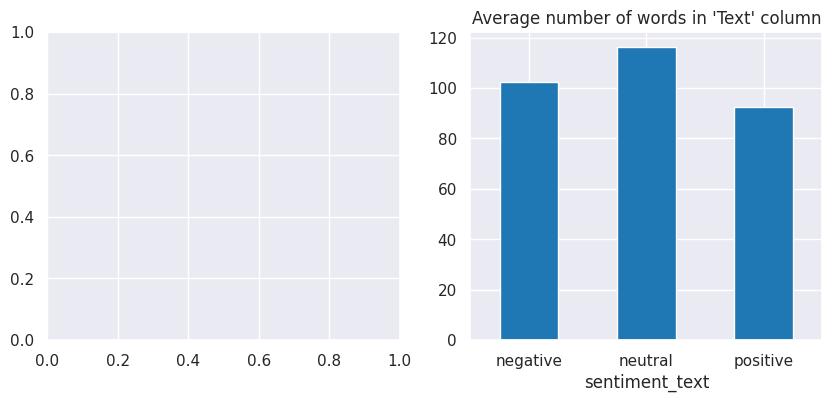

In [ ]:
average_Txt = int(df_tokens['nb_tokens_text'].mean())
max_Txt = int(df_tokens['nb_tokens_text'].max())

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_tokens.groupby("sentiment_text").nb_tokens_text.mean().plot.bar(
    x="sentiment_text", y="nb_tokens_text", ax=ax[1], rot=0
)

ax[1].set_title("Average number of words in 'Text' column")

plt.show()


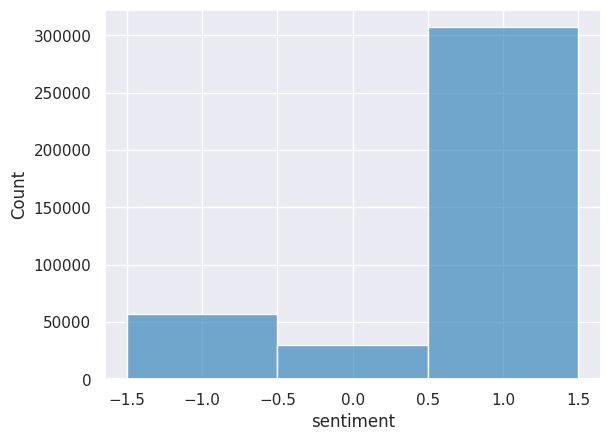

In [ ]:
sns.histplot(df, x="sentiment", alpha=0.6, discrete=True)
plt.show()

## Balance class distribution

Since the number of positive sentiments significantly outnumbers the number of other classes, this imbalance can lead to biased models that perform poorly on the minority class.


In [ ]:
rus = RandomUnderSampler(random_state=1)
df_balanced, y = rus.fit_resample(df_tokens,df_tokens['sentiment_text'])
fig = px.box(df_balanced.sample(n=1000, random_state=1), x="sentiment_text", y="nb_tokens_text", points="all", color="sentiment_text")
fig.show()

# Training Preparation:

## Split datasets

Ssince my current focus is on model selection and hyperparameter tuning, I will first split the data into 2 parts: training (80%) and validation sets (20%), with no separate test set used. However, a test set will be used for the final evaluation of the model to assess its performance on entirely unseen data.

This split way allows for a more robust and reliable evaluation process:

- Training Set: Used to train the model.
- Validation Set: Used to tune hyperparameters and make decisions about the model configuration without touching the test set.
- Test Set: Used only at the end to provide an unbiased evaluation of the final model.

In [ ]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

## Create evaluation models

**Create evaluation models to assess the performance of a classifier.**

- provide a detailed report of key classification metrics
- visually represent the model's performance through a confusion matrix


In [ ]:
def evaluate_model(clf, x_valid, y_valid):
    # pedict the class labels for the validation set.
    y_pred = clf.predict(x_valid)
    # print a classification report.
    print(classification_report(y_valid, y_pred))

    # Display the confusion matrix.
    disp = metrics.ConfusionMatrixDisplay.from_estimator(
        clf, x_valid, y_valid, cmap=plt.cm.Blues
    )
    disp.figure_.suptitle("Confusion Matrix")
    plt.grid(False)
    plt.show()

# Explore different models

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

## Baseline: BoW + Logistic Regression (0.62)

Accuracy of f1-score (macro-avg): 0.62

- **Bag-of-words (BoW)**: This method converts text data into a matrix of token counts, effectively creating a BoW model where each unique word in the text corresponds to a feature and the value represents the frequency of the word in each document.

- **SGDClassifier**: SGDClassifier is an optimization technique used in machine learning. Unlike traditional gradient descent, which uses the entire dataset to compute gradients at each step, SGD randomly picks a few samples in each iteration. This makes SGD much faster and more scalable, especially for large datasets. Setting loss='log' configures the SGDClassifier to use the logistic loss function, effectively turning it into a logistic regression classifier.


In [ ]:
vectorizer = CountVectorizer()

x_train_text = vectorizer.fit_transform(text_train)
x_valid_text = vectorizer.transform(text_valid)

              precision    recall  f1-score   support

          -1       0.72      0.66      0.69      9090
           0       0.43      0.16      0.23      4806
           1       0.89      0.96      0.93     49134

    accuracy                           0.86     63030
   macro avg       0.68      0.59      0.62     63030
weighted avg       0.83      0.86      0.84     63030



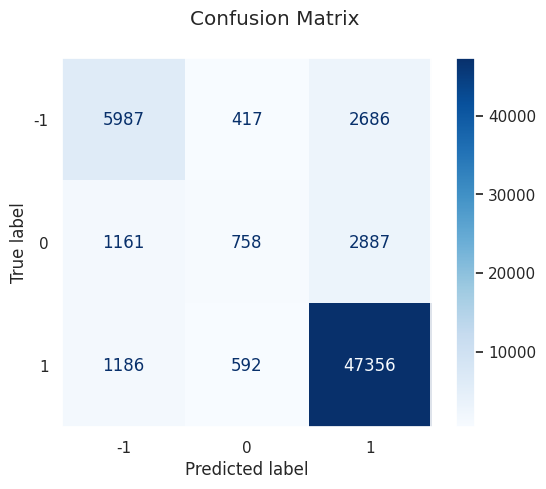

In [ ]:
model_baseline = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_baseline.fit(x_train_text, y_train)
evaluate_model(model_baseline, x_valid_text, y_valid)

**Observation of Confusion Matrix:**

The confusion matrix displays the performance of a classification model. The rows represent the true labels of the data, and the columns represent the model's predictions.

- The diagonal from top left to bottom right shows the number of correct predictions for each class (true negatives, true neutrals, and true positives).
- Off-diagonal cells show misclassifications, where the model predicted a different label than the actual one.

In the matrix, the label '1' (positive) has a high number of correct predictions (47767). However, the label '0' (neutral) has been frequently misclassified as '1' (positive), as indicated by the 3042 count. There are fewer mis-classifications as '-1' (negative), with a count of 1099. This leads to the conclusion that **this model often confuses neutral reviews with positive ones more than with negative ones**.

**Classification report for linear SGDClassifier with a logistic loss function:**

- Precision: Indicates the ratio of true positive predictions to the total predicted positives. Higher precision means fewer false positives.
- Recall: Reflects the ratio of true positive predictions to all actual positives. Higher recall means fewer false negatives.
- F1-Score: The harmonic mean of precision and recall, giving a balance between the two. It's especially useful if there's an uneven class distribution.
- Support: The number of true occurrences of each class in the validation set.

From the model:

It performs well on positive reviews (label '1'), with high precision and recall.
It struggles with neutral (label '0'), showing low recall, indicating many neutral reviews are misclassified.
Negative reviews (label '-1') have moderate precision and recall.


**Summary:**

Accuracy of f1-score (macro-avg): 0.61

## BoW + Logistic Regression + Additional Data preprocessing (0.59)

Accuracy of f1-score (macro-avg): 0.59

- **Bag-of-words (BoW)**: This method converts text data into a matrix of token counts, effectively creating a BoW model where each unique word in the text corresponds to a feature and the value represents the frequency of the word in each document.

- **SGDClassifier**: SGDClassifier is an optimization technique used in machine learning. Unlike traditional gradient descent, which uses the entire dataset to compute gradients at each step, SGD randomly picks a few samples in each iteration. This makes SGD much faster and more scalable, especially for large datasets. Setting loss='log' configures the SGDClassifier to use the logistic loss function, effectively turning it into a logistic regression classifier.


In [ ]:
train_df, test_df = model_selection.train_test_split(copied_df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 4), (78787, 4))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer = CountVectorizer()

x_train_text = vectorizer.fit_transform(text_train)
x_valid_text = vectorizer.transform(text_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.68      0.60      0.64      9090
           0       0.33      0.15      0.21      4806
           1       0.89      0.95      0.92     49134

    accuracy                           0.84     63030
   macro avg       0.63      0.57      0.59     63030
weighted avg       0.81      0.84      0.82     63030



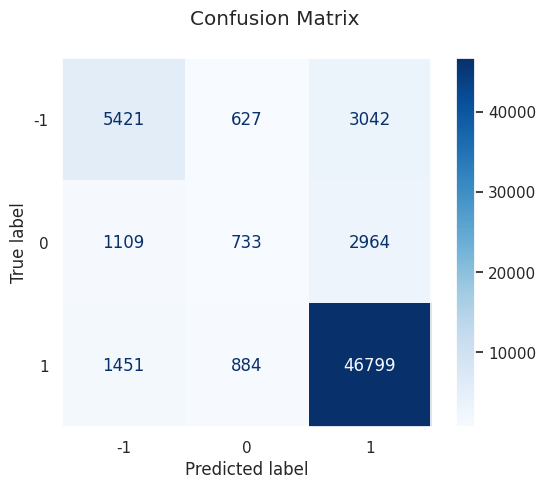

In [ ]:
model = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model.fit(x_train_text, y_train)
evaluate_model(model, x_valid_text, y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



              precision    recall  f1-score   support

          -1       0.71      0.65      0.68      9090
           0       0.45      0.14      0.22      4806
           1       0.89      0.97      0.93     49134

    accuracy                           0.86     63030
   macro avg       0.69      0.59      0.61     63030
weighted avg       0.83      0.86      0.84     63030



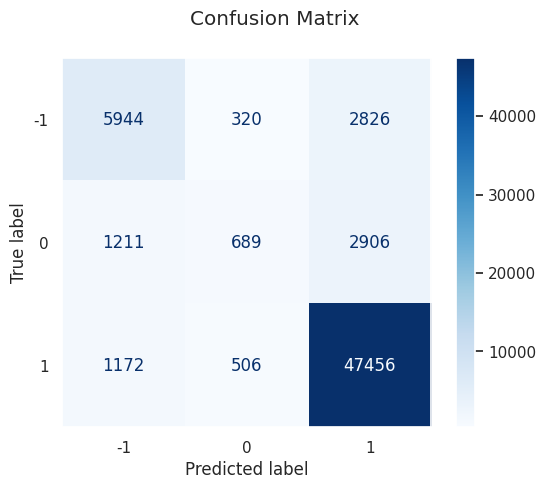

In [ ]:
model_1 = linear_model.SGDClassifier(loss="log")
model_1.fit(x_train_text, y_train)
evaluate_model(model_1, x_valid_text, y_valid)

**Observation of Confusion Matrix:**

The confusion matrix displays the performance of a classification model. The rows represent the true labels of the data, and the columns represent the model's predictions.

- The diagonal from top left to bottom right shows the number of correct predictions for each class (true negatives, true neutrals, and true positives).
- Off-diagonal cells show misclassifications, where the model predicted a different label than the actual one.

In the matrix, the label '1' (positive) has a high number of correct predictions (47767). However, the label '0' (neutral) has been frequently misclassified as '1' (positive), as indicated by the 3042 count. There are fewer mis-classifications as '-1' (negative), with a count of 1099. This leads to the conclusion that **this model often confuses neutral reviews with positive ones more than with negative ones**.

**Classification report for linear SGDClassifier with a logistic loss function:**

- Precision: Indicates the ratio of true positive predictions to the total predicted positives. Higher precision means fewer false positives.
- Recall: Reflects the ratio of true positive predictions to all actual positives. Higher recall means fewer false negatives.
- F1-Score: The harmonic mean of precision and recall, giving a balance between the two. It's especially useful if there's an uneven class distribution.
- Support: The number of true occurrences of each class in the validation set.

From the model:

It performs well on positive reviews (label '1'), with high precision and recall.
It struggles with neutral (label '0'), showing low recall, indicating many neutral reviews are misclassified.
Negative reviews (label '-1') have moderate precision and recall.


**Summary:**

Accuracy of f1-score (macro-avg): 0.61

## BoW + Logistic Regression + Undersampling (0.70)

Accuracy of f1-score (macro-avg): 0.70

In [ ]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 4), (78787, 4))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
rus = RandomUnderSampler(random_state=1)

In [ ]:
# Balance class distribution in a dataset
# Note: Since the number of positive sentiments significantly outnumbers the number of other classes, this imbalance can lead to biased models that perform poorly on the minority class.
cln_df_balanced, _ = rus.fit_resample(cln_df,cln_df['sentiment'])

text_train_balanced, text_valid_balanced, y_train, y_valid = model_selection.train_test_split(
    cln_df_balanced.Text, cln_df_balanced.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer = CountVectorizer()

x_train_text = vectorizer.fit_transform(text_train_balanced)
x_valid_text = vectorizer.transform(text_valid_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.73      0.71      0.72      4917
           0       0.61      0.60      0.61      4641
           1       0.77      0.81      0.79      4694

    accuracy                           0.71     14252
   macro avg       0.70      0.71      0.70     14252
weighted avg       0.70      0.71      0.71     14252



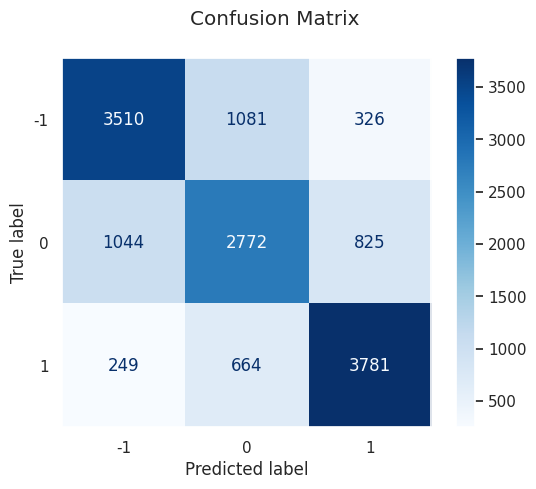

In [ ]:
model_undersampling = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_undersampling.fit(x_train_text, y_train)
evaluate_model(model_undersampling, x_valid_text, y_valid)

**Observations:**

From the confusion matrices, Model 3, which uses random undersampling, appears to have a more balanced performance across the different classes than Model 1. In particular, Model 3 has improved its recall for the negative and neutral classes compared to Model 1, suggesting that undersampling has made the model less biased towards the majority class (which is often the positive class in sentiment analysis datasets).

Random undersampling can help mitigate the class imbalance problem by reducing the number of instances in the overrepresented class, which often leads to a model that generalizes better across all classes, not just the majority class. This is likely why Model 3 performs better in terms of balance across classes, as indicated by the relatively more even spread of correct predictions in its confusion matrix.

----

**Summary**

Accuracy of f1-score (macro-avg): 0.69

## BoW + SVM (0.58)

Accuracy of f1-score (macro-avg): 0.61

- **Bag-of-words (BoW)**: This method converts text data into a matrix of token counts, effectively creating a BoW model where each unique word in the text corresponds to a feature and the value represents the frequency of the word in each document.

- **SGDClassifier**: SGDClassifier is an optimization technique used in machine learning. Unlike traditional gradient descent, which uses the entire dataset to compute gradients at each step, SGD randomly picks a few samples in each iteration. This makes SGD much faster and more scalable, especially for large datasets. Setting loss='log' configures the SGDClassifier to use the logistic loss function, effectively turning it into a logistic regression classifier.


In [ ]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 5), (78787, 5))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer = CountVectorizer()

x_train_text = vectorizer.fit_transform(text_train)
x_valid_text = vectorizer.transform(text_valid)

              precision    recall  f1-score   support

          -1       0.73      0.66      0.69      9090
           0       0.49      0.07      0.12      4806
           1       0.89      0.98      0.93     49134

    accuracy                           0.86     63030
   macro avg       0.70      0.57      0.58     63030
weighted avg       0.83      0.86      0.83     63030



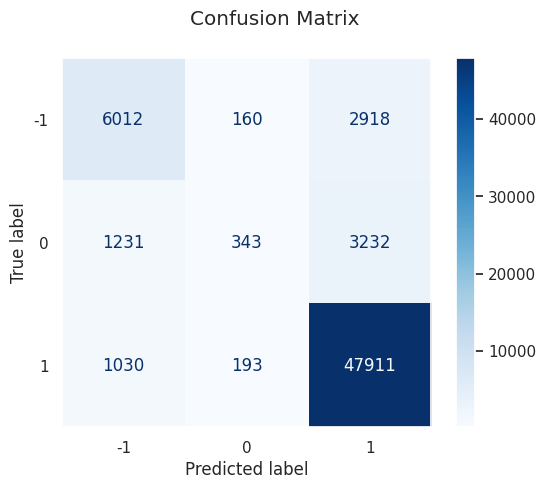

In [ ]:
model = linear_model.SGDClassifier(loss='hinge')
model.fit(x_train_text, y_train)
evaluate_model(model, x_valid_text, y_valid)

## BoW + Naive Bayes (0.62)

Accuracy of f1-score (macro-avg): 0.62

- **Bag-of-words (BoW)**: This method converts text data into a matrix of token counts, effectively creating a BoW model where each unique word in the text corresponds to a feature and the value represents the frequency of the word in each document.

- **Naive Bayes**: This is a probabilistic classifier that applies Bayes' theorem with the assumption of independence between features. It's particularly known for text classification tasks like spam detection and sentiment analysis.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

              precision    recall  f1-score   support

          -1       0.63      0.66      0.64      9090
           0       0.33      0.26      0.29      4806
           1       0.91      0.92      0.91     49134

    accuracy                           0.83     63030
   macro avg       0.62      0.61      0.62     63030
weighted avg       0.82      0.83      0.83     63030



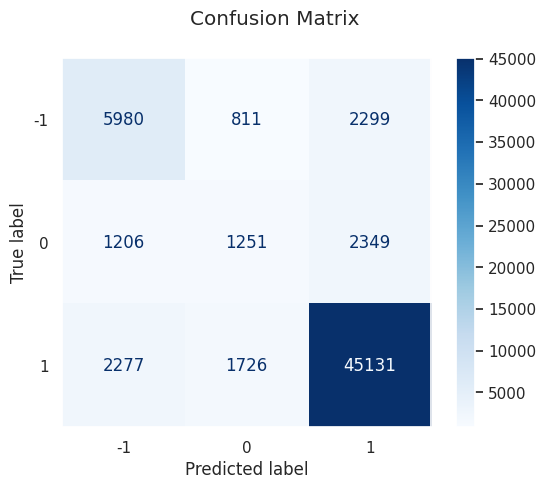

In [ ]:
model_2 = MultinomialNB()
model_2.fit(x_train_text, y_train)
evaluate_model(model_2, x_valid_text, y_valid)

**Observations:**

The confusion matrix displays the performance of a classification model. The rows represent the true labels of the data, and the columns represent the model's predictions.

- The diagonal from top left to bottom right shows the number of correct predictions for each class (true negatives, true neutrals, and true positives).
- Off-diagonal cells show misclassifications, where the model predicted a different label than the actual one.

- `Model 1 Naive Bayes` has a higher number of true negative than `Model 2 SGDClassifier` (5826 > 5661), indicating its better performance in classifying negative reviews.

- `Model 1 Naive Bayes` has a higher number of true negatives than `Model 2 SGDClassifier` (1245 > 692), indicating its better performance on negative reviews.

- `Model 1 Naive Bayes` has a lower number of true negatives than `Model 2 SGDClassifier` (45507 > 47767), indicating it has worse performance on negative reviews.

This leads to the conclusion that **Naive Bayes seems more accurate for neutral and negative reviews, while Model SGDClassifier performs better for positive reviews.**.

**Analysis:**

I think Naive Bayes's better performance on neutral and negative reviews could be due to its probabilistic nature, which can be more sensitive to the likelihood of features (words) that are characteristic of neutral language, often found in the frequency distributions that Naive Bayes relies on.

Also, SGDClassifier's better performance on positive reviews could be attributed to its ability to create a decision boundary that effectively separates more distinct sentiments, which are likely to have more pronounced language cues, through optimization techniques inherent in stochastic gradient descent.

Each model's performance is influenced by the statistical properties of the text data, the distribution of words across different classes, and how the model's underlying mathematics handles these distributions. Naive Bayes is often more effective with less data or more balanced datasets, while SGDClassifier can excel when there's a clear margin or weight that can be adjusted during the training.

**Summary:**

Accuracy of f1-score (macro-avg): 0.62

## BoW + Naive Bayes + Undersampling (0.70)

Accuracy of f1-score (macro-avg): 0.70

In [ ]:
# Balance class distribution in a dataset
# Note: Since the number of positive sentiments significantly outnumbers the number of other classes, this imbalance can lead to biased models that perform poorly on the minority class.
cln_df_balanced, _ = rus.fit_resample(cln_df,cln_df['sentiment'])

text_train_balanced, text_valid_balanced, y_train, y_valid = model_selection.train_test_split(
    cln_df_balanced.Text, cln_df_balanced.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer = CountVectorizer()

x_train_text = vectorizer.fit_transform(text_train_balanced)
x_valid_text = vectorizer.transform(text_valid_balanced)

              precision    recall  f1-score   support

          -1       0.75      0.67      0.71      4917
           0       0.60      0.64      0.62      4641
           1       0.76      0.80      0.78      4694

    accuracy                           0.70     14252
   macro avg       0.71      0.70      0.70     14252
weighted avg       0.71      0.70      0.71     14252



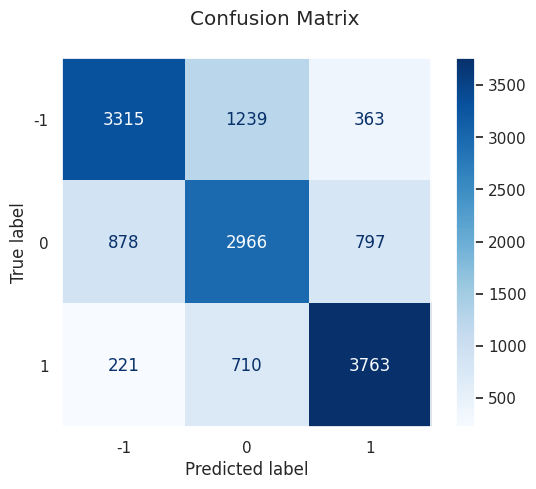

In [ ]:
model_4 = linear_model.SGDClassifier(loss="log_loss")
model_4.fit(x_train_text, y_train)
evaluate_model(model_4, x_valid_text, y_valid)

## TF-IDF + Logistic Regression (0.61)

Accuracy of f1-score (macro-avg): 0.61


- **TF-IDF**: Term Frequency-Inverse Document Frequency (TF-IDF) reflects how important a word is to a document within a collection of documents (corpus). It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. This helps to adjust for the fact that some words appear more frequently in general.

In [ ]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 5), (78787, 5))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english")  # token_pattern=r"\b\w+\b"

x_train_tfidf = vectorizer_tfidf.fit_transform(text_train)
x_valid_tfidf = vectorizer_tfidf.transform(text_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.73      0.65      0.68      9090
           0       0.47      0.14      0.22      4806
           1       0.89      0.97      0.93     49134

    accuracy                           0.86     63030
   macro avg       0.70      0.59      0.61     63030
weighted avg       0.83      0.86      0.84     63030



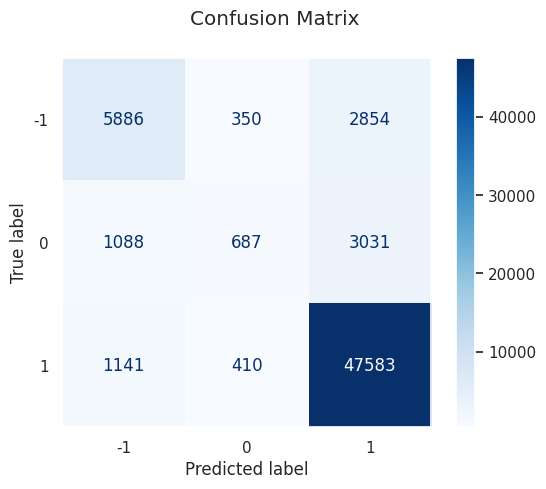

In [ ]:
model_5 = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_5.fit(x_train_tfidf, y_train)
evaluate_model(model_5, x_valid_tfidf, y_valid)

**Observations:**

- `Model BoW + Logistic Regression` has more true negatives, indicating it is more accurate for classifying negative reviews than `Model TF-IDF + Logistic Regression` (5661 >> 2742).

- `Model BoW + Logistic Regression` also has more true neutrals, suggesting it is more accurate for classifying neutral reviews than `Model TF-IDF + Logistic Regression` (692 >> 37).

- `Model BoW + Logistic Regression`  has less true positive, suggesting it slightly performs better for classifying positive reviews than `Model TF-IDF + Logistic Regression` (47767 < 48998).

Overall, **Model BoW outperforms Model TF-IDF in classifying both neutral and negative reviews.** The difference may be due to BoW capturing the presence of particular words related to neutral and negative sentiments better than TF-IDF in this context. TF-IDF's focus on word importance and rarity might lead to overlooking some common but meaningful words in negative and neutral classes.


**Overall, BoW seems to perform better as we aim to get higher accuracy in classifying neutral and negative sentiments.**


----

**Summary:**

Accuracy of f1-score (macro-avg): 0.45


## TF-IDF + Logistic Regression + Additional Data preprocessing (0.58)

Accuracy of f1-score (macro-avg): 0.45

- **TF-IDF**: Term Frequency-Inverse Document Frequency (TF-IDF) reflects how important a word is to a document within a collection of documents (corpus). It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. This helps to adjust for the fact that some words appear more frequently in general.

In [ ]:
train_df, test_df = model_selection.train_test_split(copied_df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 5), (78787, 5))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english")  # token_pattern=r"\b\w+\b"

x_train_tfidf = vectorizer_tfidf.fit_transform(text_train)
x_valid_tfidf = vectorizer_tfidf.transform(text_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.71      0.61      0.66      9090
           0       0.42      0.09      0.15      4806
           1       0.88      0.97      0.92     49134

    accuracy                           0.85     63030
   macro avg       0.67      0.56      0.58     63030
weighted avg       0.82      0.85      0.83     63030



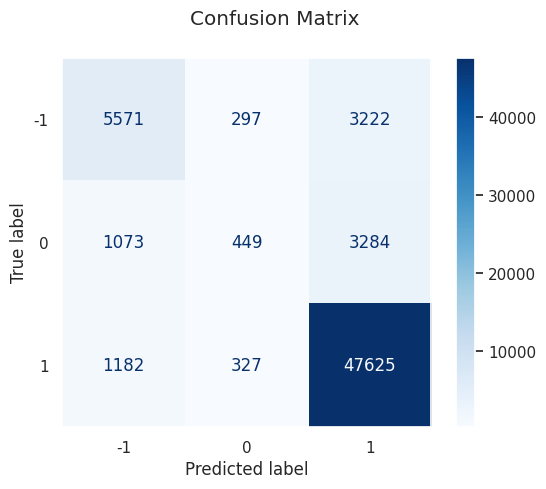

In [ ]:
model_5 = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_5.fit(x_train_tfidf, y_train)
evaluate_model(model_5, x_valid_tfidf, y_valid)

**Observations:**

- `Model BoW + Logistic Regression` has more true negatives, indicating it is more accurate for classifying negative reviews than `Model TF-IDF + Logistic Regression` (5661 >> 2742).

- `Model BoW + Logistic Regression` also has more true neutrals, suggesting it is more accurate for classifying neutral reviews than `Model TF-IDF + Logistic Regression` (692 >> 37).

- `Model BoW + Logistic Regression`  has less true positive, suggesting it slightly performs better for classifying positive reviews than `Model TF-IDF + Logistic Regression` (47767 < 48998).

Overall, **Model BoW outperforms Model TF-IDF in classifying both neutral and negative reviews.** The difference may be due to BoW capturing the presence of particular words related to neutral and negative sentiments better than TF-IDF in this context. TF-IDF's focus on word importance and rarity might lead to overlooking some common but meaningful words in negative and neutral classes.


**Overall, BoW seems to perform better as we aim to get higher accuracy in classifying neutral and negative sentiments.**


----

**Summary:**

Accuracy of f1-score (macro-avg): 0.45


## TF-IDF + Naive Bayes (0.34)

Accuracy of f1-score (macro-avg): 0.34

              precision    recall  f1-score   support

          -1       0.90      0.07      0.14      8932
           0       0.00      0.00      0.00      4833
           1       0.79      1.00      0.88     49265

    accuracy                           0.79     63030
   macro avg       0.56      0.36      0.34     63030
weighted avg       0.75      0.79      0.71     63030



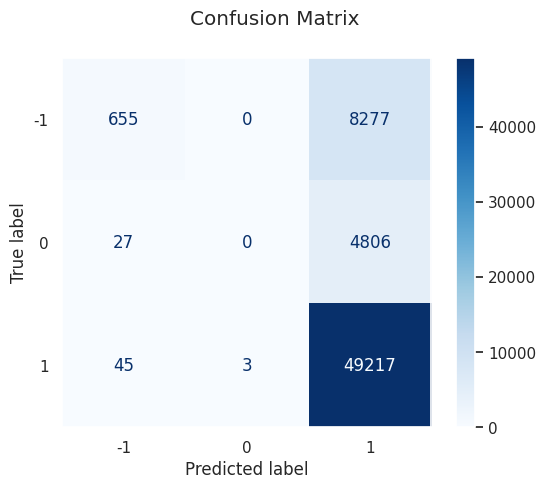

In [ ]:
model_6 = MultinomialNB()
model_6.fit(x_train_tfidf, y_train)
evaluate_model(model_6, x_valid_tfidf, y_valid)

**Observations:**

- `Model 4 (TF-IDF + SGDClassifier)` has more true negatives, indicating it is more accurate for classifying negative reviews than `Model 5 (TF-IDF + Naive Bayes)` (2742 >> 655).

- `Model 4 (TF-IDF + SGDClassifier)` also has more true neutrals, suggesting it is more accurate for classifying neutral reviews than `Model 5 (TF-IDF + Naive Bayes)` (37 >> 0). In fact, `Model 5 (TF-IDF + Naive Bayes)` appears to misclassify all neutral reviews.

- `Model 4 (TF-IDF + SGDClassifier)` also has slightly less true positives, suggesting it is slightly less accurate for classifying positive reviews than `Model 5 (TF-IDF + Naive Bayes)` (48998 < 49217).

Overall, **Model 4 (TF-IDF + SGDClassifier) outperforms Model 5 (TF-IDF + Naive Bayes) in classifying both neutral and negative reviews.** It appears to provide a more balanced performance across different classes.


**Analysis:**

I think the reasons why Model 4 (TF-IDF + SGDClassifier) outperforms Model 5 (TF-IDF + Naive Bayes) is probably because SGDClassifier can optimize a variety of loss functions, making it more flexible. Also since TF-IDF emphasizes important terms which appear less frequently across documents, SGDClassifier can leverage these weights more effectively during optimization than Naive Bayes.

----

**Summary:**

Accuracy of f1-score (macro-avg): 0.34


## TF-IDF + SVM (0.)

Accuracy of f1-score (macro-avg): 0.34

              precision    recall  f1-score   support

          -1       0.80      0.39      0.53      9090
           0       0.50      0.00      0.00      4806
           1       0.83      0.99      0.91     49134

    accuracy                           0.83     63030
   macro avg       0.71      0.46      0.48     63030
weighted avg       0.80      0.83      0.78     63030



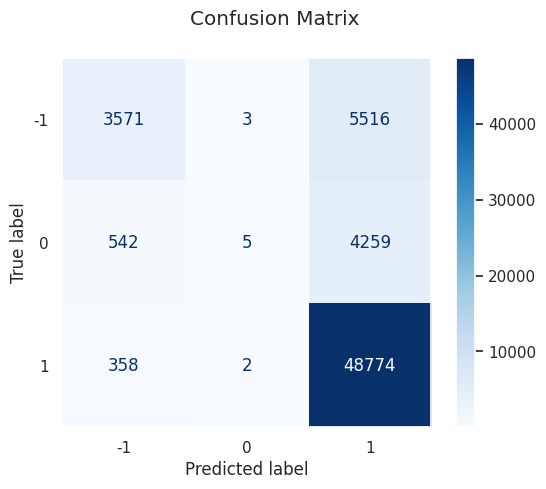

In [ ]:
model = linear_model.SGDClassifier(loss='hinge')
model.fit(x_train_tfidf, y_train)
evaluate_model(model, x_valid_tfidf, y_valid)

**Observations:**

- `Model 4 (TF-IDF + SGDClassifier)` has more true negatives, indicating it is more accurate for classifying negative reviews than `Model 5 (TF-IDF + Naive Bayes)` (2742 >> 655).

- `Model 4 (TF-IDF + SGDClassifier)` also has more true neutrals, suggesting it is more accurate for classifying neutral reviews than `Model 5 (TF-IDF + Naive Bayes)` (37 >> 0). In fact, `Model 5 (TF-IDF + Naive Bayes)` appears to misclassify all neutral reviews.

- `Model 4 (TF-IDF + SGDClassifier)` also has slightly less true positives, suggesting it is slightly less accurate for classifying positive reviews than `Model 5 (TF-IDF + Naive Bayes)` (48998 < 49217).

Overall, **Model 4 (TF-IDF + SGDClassifier) outperforms Model 5 (TF-IDF + Naive Bayes) in classifying both neutral and negative reviews.** It appears to provide a more balanced performance across different classes.


**Analysis:**

I think the reasons why Model 4 (TF-IDF + SGDClassifier) outperforms Model 5 (TF-IDF + Naive Bayes) is probably because SGDClassifier can optimize a variety of loss functions, making it more flexible. Also since TF-IDF emphasizes important terms which appear less frequently across documents, SGDClassifier can leverage these weights more effectively during optimization than Naive Bayes.

----

**Summary:**

Accuracy of f1-score (macro-avg): 0.34


## TF-IDF + Logistic Regression + UnderSampling (0.68)

Accuracy of f1-score (macro-avg): 0.68


In [ ]:
train_df, test_df = model_selection.train_test_split(df, test_size=0.2, random_state=0)

train_df.shape, test_df.shape

((315146, 5), (78787, 5))

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(315146, 2)

In [ ]:
# Balance class distribution in a dataset
# Note: Since the number of positive sentiments significantly outnumbers the number of other classes, this imbalance can lead to biased models that perform poorly on the minority class.
cln_df_balanced, _ = rus.fit_resample(cln_df,cln_df['sentiment'])

text_train_balanced, text_valid_balanced, y_train, y_valid = model_selection.train_test_split(
    cln_df_balanced.Text, cln_df_balanced.sentiment, test_size=0.2, random_state=1
)

In [ ]:
vectorizer_tfidf = TfidfVectorizer(stop_words="english")  # token_pattern=r"\b\w+\b"

x_train_tfidf = vectorizer_tfidf.fit_transform(text_train_balanced)
x_valid_tfidf = vectorizer_tfidf.transform(text_valid_balanced)

              precision    recall  f1-score   support

          -1       0.70      0.71      0.70      4921
           0       0.62      0.55      0.58      4649
           1       0.72      0.79      0.76      4673

    accuracy                           0.68     14243
   macro avg       0.68      0.68      0.68     14243
weighted avg       0.68      0.68      0.68     14243



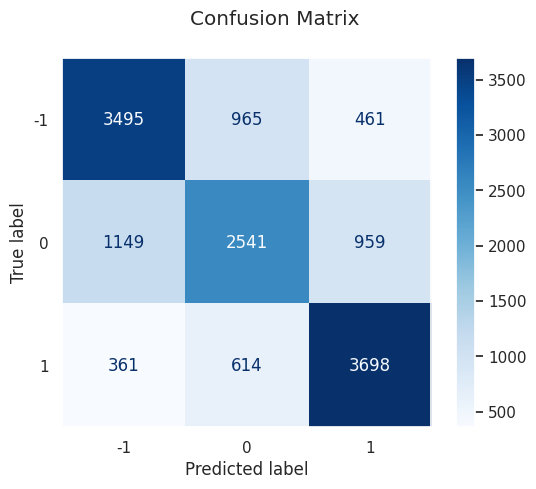

In [ ]:
model_7 = linear_model.SGDClassifier(loss="log_loss")
model_7.fit(x_train_tfidf, y_train)
evaluate_model(model_7, x_valid_tfidf, y_valid)

**Observations:**

Compare `Model 3 (BoW + SGDClassifier + Random UnderSampling)` with `Model 6 (TF-IDF + SGDClassifier + Random UnderSampling)`:

- Model 3 `BoW` has more true negatives, meaning it is slightly more accurate in classifying negative reviews than Model 1 (3724 > 3495).

- Model 6 has `TF-IDF` more true neutrals, suggesting it is more accurate in classifying neutral reviews (2541 > 2402).

- Model 3 `BoW` has more true positives, indicating better performance in classifying positive reviews (3825 > 3698).


Overall, the random undersampling method appears to help both models achieve a more balanced classification across the different sentiment classes. Model 3 `BoW + SGDClassifier + UnderSampling`  seems to be slightly more effective, with better performance in classifying negative and positive reviews, while Model `TF-IDF` performs better with neutral reviews.

----

**Summary:**

Accuracy of f1-score (macro-avg): 0.68

## GloVe + Logistic Regression (0.49)

Accuracy of f1-score (macro-avg): 0.49


According to this [Comparative Guide to Word Embedding Techniques](https://analyticsindiamag.com/word2vec-vs-glove-a-comparative-guide-to-word-embedding-techniques/), `GloVe (Global Vectors for Word Representation)` and `Word2Vec` are both methods for obtaining vector representations of words, known as word embeddings. The primary difference lies in how they're trained:

- `Word2Vec` is a predictive model that uses surrounding words to predict a target word, using either the Continuous Bag of Words (CBOW) or Skip-Gram approach. Thus, `Word2Vec` captures more of the syntactic relationships between words.

- `GloVe` is a count-based model that analyzes words' co-occurrence statistics in the entire corpus. Its objective is to learn word vectors such that their dot product equals the probability of their co-occurrence. `GloVe` captures more of the global statistics of the corpus to infer the semantic relationships between words.

For my project, I decided to explore both models and take a closer look at which model can classify reviews more accurately.


In [ ]:
# List of model available on Gensim

for k in gensim_api.info()["models"]:
    print(k)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
WV = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
cln_df = train_df[["Text", "sentiment"]].copy()
cln_df.dropna(subset=["Text"], inplace=True)
cln_df.head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,-1
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,-1
4,Great taffy at a great price. There was a wid...,1


In [ ]:
# creating a fixed-size vector for a sentence
def vectorize_sentence_bow(words, wv=WV):
    embeddings = []
    for word in words:
        try:
            embeddings.append(wv[word])
        except KeyError:
            pass
    return np.array(embeddings).mean(axis=0)

In [ ]:
# preprocessing and tokenization
def preprocess_and_tokenize(text):
    # Simple preprocessing to remove non-alphabetic characters
    text = re.sub(r'\W+', ' ', text.lower())
    # Tokenization by splitting on whitespace
    return text.split()

In [ ]:
# Using the function to tokenize a piece of text
sample = preprocess_and_tokenize("This is a sample sentence for tokenization.")

sample

['this', 'is', 'a', 'sample', 'sentence', 'for', 'tokenization']

In [ ]:
# tokenize text into words
def tokenize_text(text):
    pattern = re.compile(r'\b\w\w+\b')  # Pattern to match words with 2+ characters
    return pattern.findall(text)

In [ ]:
# create embeddings for a list of words
def vectorize_sentence(words, word_vectors):
    valid_words = [word for word in words if word in word_vectors]
    if valid_words:
        embeddings = [word_vectors[word] for word in valid_words]
        return np.mean(embeddings, axis=0)
    else:
        return np.nan

In [ ]:
cln_df['words'] = cln_df['Text'].apply(tokenize_text)
cln_df.head()

,Text,sentiment,words
10600,I will start off by saying I have yet to purch...,1,"[will, start, off, by, saying, have, yet, to, ..."
115044,What I love about Ceylon tea is the aroma in a...,1,"[What, love, about, Ceylon, tea, is, the, arom..."
437961,Emerald Harmony Deluxe Fruit I shared with fam...,1,"[Emerald, Harmony, Deluxe, Fruit, shared, with..."
396142,If you want to dabble with cat grass give this...,0,"[If, you, want, to, dabble, with, cat, grass, ..."
314524,"I like the taste of agave, it has a maple/hone...",1,"[like, the, taste, of, agave, it, has, maple, ..."


In [ ]:
# apply vectorization to each tokenized text and store the results
tqdm.pandas()  # Enables progress_apply with a progress bar
cln_df['embeddings'] = cln_df['words'].progress_apply(lambda words: vectorize_sentence(words, WV))

  0%|          | 0/315146 [00:00<?, ?it/s]

In [ ]:
# remove rows with missing embeddings
cln_df.dropna(subset=['embeddings'], inplace=True)

In [ ]:
# prepare train and validation sets while transforming the variable-length text data into a fixed-size numerical representation
x_train_embedding, x_valid_embedding, y_train, y_valid = model_selection.train_test_split(
    np.stack(cln_df.embeddings), # convert list of GloVe word vectors for each text entry into a 2D NumPy array
    cln_df.sentiment,
    test_size=0.2,
    random_state=1,
)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.63      0.44      0.51      9020
           0       0.34      0.04      0.07      4809
           1       0.84      0.96      0.90     48927

    accuracy                           0.82     62756
   macro avg       0.60      0.48      0.49     62756
weighted avg       0.77      0.82      0.78     62756



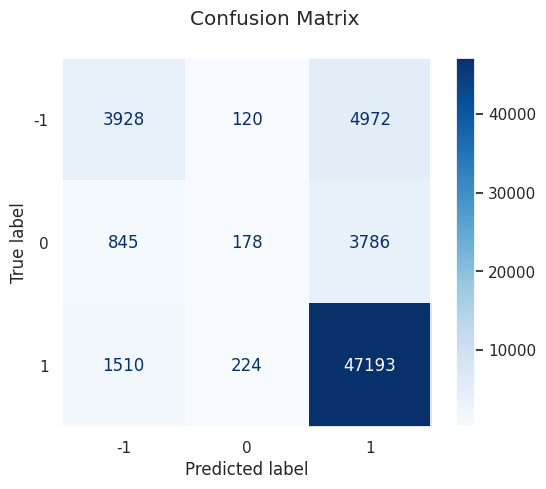

In [ ]:
model_8 = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_8.fit(x_train_embedding, y_train)
evaluate_model(model_8, x_valid_embedding, y_valid)

**Observations:**

- `Model BoW` classifies negative reviews more accurately than `Model 4 GloVe`, with a higher number of true negatives (5760 >> 3190)

- `Model BoW` also classifies neutral reviews more accurately, with a higher number of true neutrals (704 >> 54).

- For positive reviews, both models perform comparably, but `Model BoW` has a slightly higher true positive rate (47648 ≈ 47783)


From this comparison, we can infer that Model 1 (BoW + SGDClassifier) appears to classify neutral and negative reviews more accurately than Model 7 (GloVe + SGDClassifier).

This result makes me feel very surprised. I think the reason why `Model BoW + Logistic Regression` performs more accurate than `Model GloVe + Logistic Regression` is probably because:

1. BoW may capture the dataset's specific nuances better by emphasizing the frequency of words unique to neutral and negative reviews.

2. The training data may include domain-specific language that BoW can leverage more effectively than GloVe, which is pre-trained on a general corpus and may miss nuances specific to Amazon product reviews.

----

**Summary:**

Accuracy of f1-score (macro-avg): 0.46


## Word2Vec + Logistic Regression (0.49)

Accuracy of f1-score (macro-avg): 0.49

In [ ]:
WV_word2vec = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
cln_df["embeddings_word2vec"] = cln_df.words.progress_map(
    vectorize_sentence_bow, WV_word2vec
)
cln_df.dropna(inplace=True)

x_train_word2vec, x_valid_word2vec, y_train, y_valid = model_selection.train_test_split(
    np.stack(cln_df.embeddings_word2vec),
    cln_df.sentiment,
    test_size=0.2,
    random_state=1,
)

  0%|          | 0/313776 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

          -1       0.63      0.44      0.51      9020
           0       0.34      0.04      0.07      4809
           1       0.84      0.96      0.90     48927

    accuracy                           0.82     62756
   macro avg       0.60      0.48      0.49     62756
weighted avg       0.77      0.82      0.78     62756



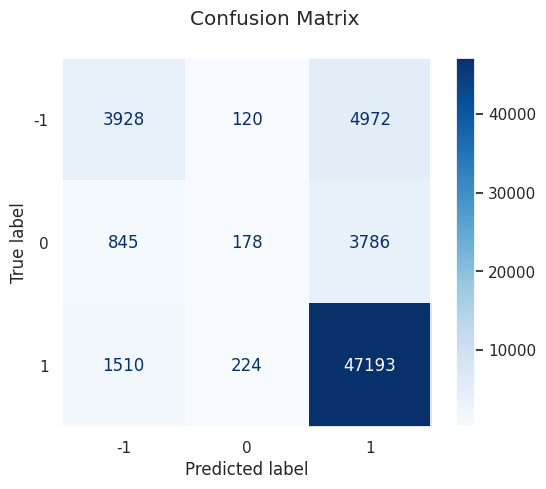

In [ ]:
model_9 = LogisticRegression(
    solver="lbfgs", multi_class="multinomial", max_iter=100
)
model_9.fit(x_train_word2vec, y_train)
evaluate_model(model_9, x_valid_word2vec, y_valid)

**Observations:**

- `Model 5 Word2Vec` has more true negatives than `Model 4 GloVe` (3331 > 3190).

- `Model 5 Word2Vec` has slightly less true neutrals compared to `Model 4 GloVe` (43 < 54).

- `Model 5 Word2Vec` has almost same true positives compared to `Model 4 GloVe` (47710 ≈ 47783).

Overall, both models perform similarly, while `Model 5 Word2Vec` seems to classify negative reviews slightly more accurately and Model 4 is slightly better with neutral reviews.

----

**Summary:**

Accuracy of f1-score (macro-avg): 0.46


## BERT Embedding + Logistic Regression (0.55)

### Import libraries

In [ ]:
!pip show transformers

In [ ]:
from transformers import (
    BertModel,
    BertTokenizer,
    DistilBertModel,
    DistilBertTokenizer,
    DistilBertTokenizerFast,
)

import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import os
from torch.utils.data import Dataset

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model_class, tokenizer_class = DistilBertModel, DistilBertTokenizerFast
pretrained_weights = "distilbert-base-uncased"

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
model = model.to(device)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

### Feature extraction

In [ ]:
cln_df_test = test_df[["Text", "sentiment"]].copy()
cln_df_test.dropna(subset=["Text"], inplace=True)
cln_df_test.reset_index(drop=True, inplace=True)
cln_df_test.head(5)

,Text,sentiment
0,I bought these in hopes of finding a healthy a...,0
1,I love this stuff and it's good for you (or at...,1
2,I spent a few weeks in the Southwest on my ann...,1
3,These cookies are delicious. As a busy mom I ...,1
4,"Light fizz, cherry taste, no sugar, juice drin...",1


In [ ]:
## Split to train and validation sets.
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text,
    cln_df.sentiment,
    test_size=0.2,
    random_state=1,
)
x_test, y_test = cln_df_test.Text, cln_df_test.sentiment

In [ ]:
## Here we take only 30% of train and validation data, to make embeddins extraction faster.
PERCENTAGE_SIZE = 0.3
BATCH_SIZE = 250

In [ ]:
# Take 20% to reduce computation time.
train_chunks = [
    x_train[i : i + BATCH_SIZE]
    for i in range(0, int(x_train.shape[0] * PERCENTAGE_SIZE), BATCH_SIZE)
]
valid_chunks = [
    x_valid[i : i + BATCH_SIZE]
    for i in range(0, int(x_valid.shape[0] * PERCENTAGE_SIZE), BATCH_SIZE)
]
test_chunks = [
    x_test[i : i + BATCH_SIZE] for i in range(0, int(x_test.shape[0]), BATCH_SIZE)
]

# Take 20% of labels
y_train_chunks = [
    y_train[i : i + BATCH_SIZE]
    for i in range(0, int(y_train.shape[0] * PERCENTAGE_SIZE), BATCH_SIZE)
]
y_valid_chunks = [
    y_valid[i : i + BATCH_SIZE]
    for i in range(0, int(y_valid.shape[0] * PERCENTAGE_SIZE), BATCH_SIZE)
]
y_test_chunks = [
    y_test[i : i + BATCH_SIZE] for i in range(0, int(y_test.shape[0]), BATCH_SIZE)
]

y_train_chunks = np.concatenate(y_train_chunks)
y_valid_chunks = np.concatenate(y_valid_chunks)
y_test_chunks = np.concatenate(y_test_chunks)

In [ ]:
train_features = []
# list_input_ids = []
# list_attention_mask = []
for chunk in tqdm.tqdm(train_chunks):
    tok_text = tokenizer.batch_encode_plus(
        chunk.tolist(),
        add_special_tokens=True,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        return_tensors="pt",
    )

    # list_input_ids.append(tok_text["input_ids"])
    # list_attention_mask.append(tok_text["attention_mask"])

    tok_text = tok_text.to(device)
    with torch.no_grad():
        last_hidden_states = model(**tok_text)

    features = last_hidden_states[0][:, 0, :].cpu().numpy()
    train_features.append(features)


train_features = np.concatenate(train_features)
# list_input_ids = np.concatenate(list_input_ids)
# list_attention_mask = np.concatenate(list_attention_mask)
train_features.shape

100%|██████████| 303/303 [21:43<00:00,  4.30s/it]


(75750, 768)

In [ ]:
valid_features = []
# list_input_ids = []
# list_attention_mask = []
for chunk in tqdm.tqdm(valid_chunks):
    tok_text = tokenizer.batch_encode_plus(
        chunk.tolist(),
        add_special_tokens=True,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        return_tensors="pt",
    )

    tok_text = tok_text.to(device)
    with torch.no_grad():
        last_hidden_states = model(**tok_text)

    features = last_hidden_states[0][:, 0, :].cpu().numpy()
    valid_features.append(features)


valid_features = np.concatenate(valid_features)
# list_input_ids = np.concatenate(list_input_ids)
# list_attention_mask = np.concatenate(list_attention_mask)
valid_features.shape

100%|██████████| 76/76 [05:18<00:00,  4.19s/it]


(19000, 768)

In [ ]:
test_features = []
# list_input_ids = []
# list_attention_mask = []
for chunk in tqdm.tqdm(test_chunks):
    tok_text = tokenizer.batch_encode_plus(
        chunk.tolist(),
        add_special_tokens=True,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        return_tensors="pt",
    )

    tok_text = tok_text.to(device)
    with torch.no_grad():
        last_hidden_states = model(**tok_text)

    features = last_hidden_states[0][:, 0, :].cpu().numpy()
    test_features.append(features)


test_features = np.concatenate(test_features)
# list_input_ids = np.concatenate(list_input_ids)
# list_attention_mask = np.concatenate(list_attention_mask)
test_features.shape

100%|██████████| 316/316 [22:04<00:00,  4.19s/it]


(78787, 768)

In [ ]:
np.save("train_features.npy", train_features)
np.save("valid_features.npy", valid_features)
np.save("test_features.npy", test_features)

### Train

In [ ]:
# load train and validation features
train_features = np.load("train_features.npy")
valid_features = np.load("valid_features.npy")
test_features = np.load("test_features.npy")

train_features_summary = np.load("train_features_summary.npy")
valid_features_summary = np.load("valid_features_summary.npy")
test_features_summary = np.load("test_features_summary.npy")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



              precision    recall  f1-score   support

          -1       0.77      0.49      0.60      2678
           0       0.46      0.08      0.14      1452
           1       0.86      0.98      0.92     14870

    accuracy                           0.84     19000
   macro avg       0.70      0.52      0.55     19000
weighted avg       0.82      0.84      0.81     19000



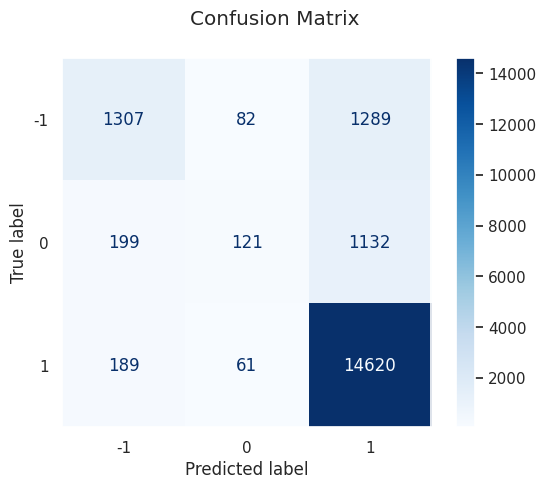

In [ ]:
## Train a model on the training features.

train_features = train_features.reshape(train_features.shape[0], -1)
valid_features = valid_features.reshape(valid_features.shape[0], -1)

model_11 = linear_model.SGDClassifier(loss="log")
model_11.fit(train_features, y_train_chunks)
evaluate_model(model_11, valid_features, y_valid_chunks)

## VADER (0.47)

Accuracy of f1-score (macro-avg): 0.47

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It can analyze the sentiment of texts directly without the need for further tokenization or machine learning models like SGDClassifier.

Since VADER provides a sentiment score based on the lexical features of the text, which can be used directly to determine the sentiment of the text, it's designed to be used out-of-the-box and requires no training on your part.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
example = "This oatmeal is not as good as before."
sia.polarity_scores(example)

{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.3412}

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(393933, 2)

In [ ]:
text_train, text_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text, cln_df.sentiment, test_size=0.2, random_state=1
)

In [ ]:
# Run VADER's polarity scores on the training dataset
train_scores = [sia.polarity_scores(text) for text in tqdm(text_train)]

# Convert the list of dictionaries into a DataFrame
train_scores_df = pd.DataFrame(train_scores)

# concatenate this DataFrame with your training labels
train_df_final = pd.concat([text_train.reset_index(drop=True), train_scores_df, y_train.reset_index(drop=True)], axis=1)

train_df_final

  0%|          | 0/315146 [00:00<?, ?it/s]

,Text,neg,neu,pos,compound,sentiment
0,Loved the taste It was just as they said very ...,0.000,0.608,0.392,0.9311,1
1,Old Wessex Scottish style porridge oats has be...,0.000,0.805,0.195,0.9485,1
2,This has a nice and creamy vanilla flavor. Go...,0.000,0.667,0.333,0.8172,1
3,I was pleasantly surprised by the quality of t...,0.028,0.859,0.114,0.9391,1
4,This avocado oil is one of the most multitaskf...,0.000,0.725,0.275,0.8210,1
...,...,...,...,...,...,...
315141,Real-man-of-genius provides excellent and time...,0.000,0.838,0.162,0.7506,1
315142,Perfect any time after school or just for snac...,0.000,0.781,0.219,0.9824,1
315143,Don't recommend this mix if you like denser wa...,0.080,0.879,0.041,-0.3421,0
315144,I placed this order along with 2 other plants ...,0.000,0.964,0.036,0.5413,1


In [ ]:
# repeat the same process for the validation dataset
valid_scores = [sia.polarity_scores(text) for text in tqdm(text_valid)]
valid_scores_df = pd.DataFrame(valid_scores)
valid_df_final = pd.concat([text_valid.reset_index(drop=True), valid_scores_df, y_valid.reset_index(drop=True)], axis=1)

  0%|          | 0/78787 [00:00<?, ?it/s]

Note: The choice of a threshold for VADER's compound score depends on the specific requirements of the sentiment analysis task and the nature of your dataset. A common default threshold is 0.05 because VADER's compound scores range from -1 to 1, and scores close to 0 can be considered neutral.

I think a threshold of 0.5 would be more applicable, because I want fewer texts to be classified as positive or negative, and more as neutral. However, if we aim to have a more sensitive distinction between positive, neutral, and negative sentiments, the threshold could be tuned by using a validation set to optimize the performance of the sentiment classification.

In [ ]:
# Define a threshold for deciding between positive, neutral, and negative
threshold = 0.5  # Example threshold

# Function to convert VADER compound scores to sentiment labels
def vader_to_label(compound, threshold):
    if compound >= threshold:
        return 1  # positive sentiment
    elif compound <= -threshold:
        return -1  # negative sentiment
    else:
        return 0  # neutral sentiment

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate VADER's performance
def evaluate_vader(compound_scores, true_labels, threshold):
    # Convert compound scores to predicted sentiment labels
    y_pred = [vader_to_label(score, threshold) for score in compound_scores]

    # Print the classification report
    print(classification_report(true_labels, y_pred))

    # Generate and display a confusion matrix
    cm = confusion_matrix(true_labels, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

          -1       0.64      0.25      0.36     11559
           0       0.14      0.30      0.19      6031
           1       0.87      0.87      0.87     61197

    accuracy                           0.73     78787
   macro avg       0.55      0.47      0.47     78787
weighted avg       0.78      0.73      0.74     78787



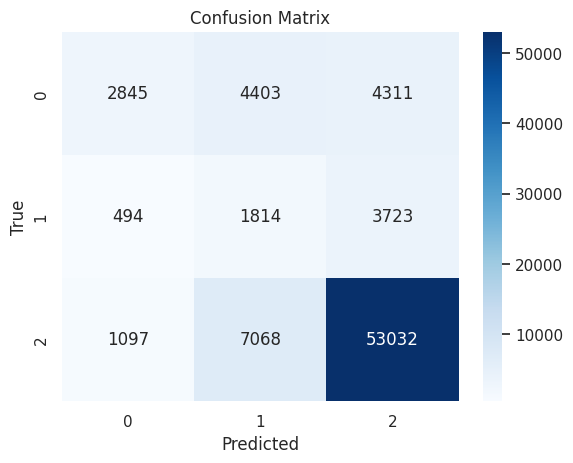

In [ ]:
# Assuming 'compound' is a column in valid_df_final from the VADER results
evaluate_vader(valid_df_final['compound'].values, valid_df_final['sentiment'].values, threshold)

## VADER + Undersampling (0.46)

Accuracy of f1-score (macro-avg): 0.46

In [ ]:
# Copy the relevant columns into a new DataFrame
cln_df = train_df[["Text", "sentiment"]].copy()

# Drop any rows with missing 'Text' values
cln_df.dropna(subset=["Text"], inplace=True)

cln_df.shape

(393933, 2)

In [ ]:
# Balance class distribution in a dataset
# Note: Since the number of positive sentiments significantly outnumbers the number of other classes, this imbalance can lead to biased models that perform poorly on the minority class.
cln_df_balanced, _ = rus.fit_resample(cln_df,cln_df['sentiment'])

text_train_balanced, text_valid_balanced, y_train, y_valid = model_selection.train_test_split(
    cln_df_balanced.Text, cln_df_balanced.sentiment, test_size=0.2, random_state=1
)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Run VADER's polarity scores on the training dataset
train_scores = [sia.polarity_scores(text) for text in tqdm(text_train_balanced)]

# Convert the list of dictionaries into a DataFrame
train_scores_df = pd.DataFrame(train_scores)

# concatenate this DataFrame with your training labels
train_df_final = pd.concat([text_train_balanced.reset_index(drop=True), train_scores_df, y_train.reset_index(drop=True)], axis=1)

train_df_final

  0%|          | 0/75124 [00:00<?, ?it/s]

,Text,neg,neu,pos,compound,sentiment
0,I love these brownies with walnuts. They're m...,0.026,0.671,0.303,0.9512,1
1,This syrup is awesome! I have a Sodastream an...,0.000,0.779,0.221,0.9476,1
2,This is organic folgers or maxwell house. Thi...,0.081,0.919,0.000,-0.2755,-1
3,"I recently began a high-protein, low-sugar die...",0.103,0.703,0.194,0.9288,1
4,"I love this dark chocolate bar, absolutely gre...",0.033,0.761,0.206,0.9059,1
...,...,...,...,...,...,...
75119,I purchased this because I used to eat them as...,0.124,0.822,0.054,-0.5030,-1
75120,This is a great product. The cereal tastes gr...,0.000,0.828,0.172,0.9377,1
75121,We love these! This was a great deal as these...,0.000,0.713,0.287,0.9459,1
75122,I am having a hard time understanding exactly ...,0.070,0.736,0.193,0.9595,-1


In [ ]:
# repeat the same process for the validation dataset
valid_scores = [sia.polarity_scores(text) for text in tqdm(text_valid_balanced)]
valid_scores_df = pd.DataFrame(valid_scores)
valid_df_final = pd.concat([text_valid_balanced.reset_index(drop=True), valid_scores_df, y_valid.reset_index(drop=True)], axis=1)

  0%|          | 0/18781 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          -1       0.72      0.24      0.36      5111
           0       0.25      0.29      0.27      3701
           1       0.67      0.86      0.75      9969

    accuracy                           0.58     18781
   macro avg       0.54      0.46      0.46     18781
weighted avg       0.60      0.58      0.55     18781



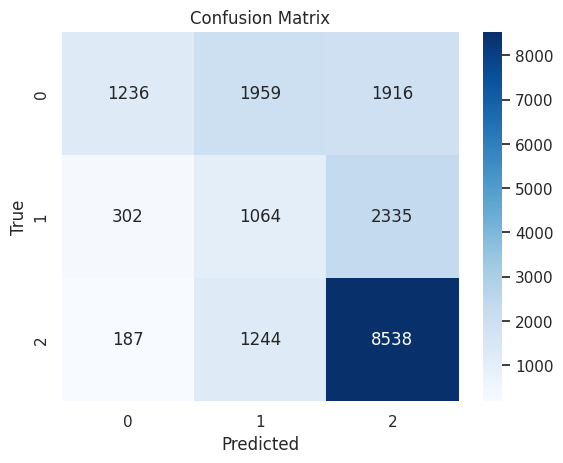

In [ ]:
# Assuming 'compound' is a column in valid_df_final from the VADER results
threshold = 0.5
evaluate_vader(valid_df_final['compound'].values, valid_df_final['sentiment'].values, threshold)

# DistilBERT Fine-tuning

Considering the classification task for my project is less complex and I have limited resources but want more efficient computation, I decided to start with the `DistilBERT model` as it is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

Reference: https://huggingface.co/docs/transformers/v4.15.0/model_doc/distilbert

However, if I find that the accuracy is not satisfactory or need to capture more subtle nuances in the reviews, I will then try exploring BERT.

To improve the performance of the model, instead of training dedicatede classifier on the extracted features, I applied classification layer on top of BERT. Therefore, the whole constructed model is fine-tuned, including the BERT weights.

🚧 To run this code, I used V100GPU instance on Colab. Estimated running time is around 2 hours. 🚧




**References:**

HuggingFace Tutorial: https://huggingface.co/learn/nlp-course/zh-CN/chapter3/3?fw=pt

Youtube Tutorial: https://www.youtube.com/watch?v=9he4XKqqzvE

Code sample: https://colab.research.google.com/drive/1U7SX7jNYsNQG5BY1xEQQHu48Pn6Vgnyt?usp=sharing#scrollTo=IlOgGiojuWwG


### Pre-train

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.9 MB/s eta 0:00:00


In [ ]:
import transformers

transformers.__version__

'4.35.2'

In [ ]:
from transformers import DataCollatorWithPadding, AutoTokenizer
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Extract text and label from the dataframe.
cln_df = train_df[["Text", "sentiment"]].copy()
cln_df.dropna(subset=["Text"], inplace=True)
cln_df.reset_index(drop=True, inplace=True)

In [ ]:
## Split to train and validation sets.
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
    cln_df.Text,
    cln_df.sentiment,
    test_size=0.2,
    random_state=1,
)
x_train.shape, y_train.shape

((252116,), (252116,))

To balance the dataset by reducing the number of examples in the overrepresented classes, I did understampling of `x_train` and `y_train`. By doing this, I want to prevent the model from being biased towards the majority class during training and to potentially improve its performance on minority classes.

References:

Youtube Tutorial: https://www.youtube.com/watch?v=IzbjGaYQB-U

BERT: Handling class imbalance in text classification: https://medium.com/@nikviz/bert-handling-class-imbalance-in-language-models-7fe9ccc62cb6

In [ ]:
# UnderSampling of the x_train and y_train
rus = RandomUnderSampler(
    random_state=0, sampling_strategy={-1: 25000, 0: 18905, 1: 50000}
)
x_train, y_train = rus.fit_resample(
    np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1)
)

(array([25000., 18905., 50000.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <BarContainer object of 3 artists>)

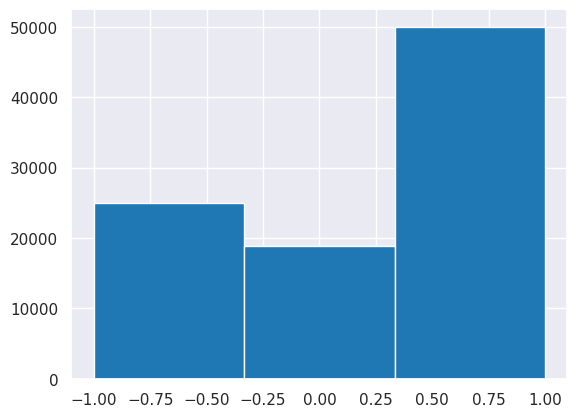

In [ ]:
# Check distribution of classes by plot histogram of y_train
# Because y_train contains labels of training data after being undersampled)
plt.hist(y_train, bins=3)

Convert the training and validation datasets into lists and then reduce the size of the validation set (both features and labels) in order to reduce computational load or working with a more manageable subset of the validation data.

In [ ]:
VAL_DATA_DIVIDER = 10

x_train = x_train.reshape(-1).tolist()[:]
x_valid = x_valid.values.tolist()[: len(x_valid) // VAL_DATA_DIVIDER]

y_train = y_train.reshape(-1).tolist()[:]
y_valid = y_valid.values.tolist()[: len(y_valid) // VAL_DATA_DIVIDER]

len(x_train), len(x_valid), len(y_train), len(y_valid)

(93905, 6303, 93905, 6303)

Here I made a decision that, instead of using `BERT` for this fine-tuning task, I chose `DistilBERT` because it is designed to retain most of the performance of BERT while being more efficient. Also, since I have limited computational resources, DistilBERT would be a better choice because the training and inference times with DistilBERT are much faster than with BERT, which is very crucial given the time constraint of this project.

**References:**

HuggingFace page:  https://huggingface.co/docs/transformers/model_doc/distilbert

Why DistilBERT: https://medium.com/geekculture/hugging-face-distilbert-tensorflow-for-custom-text-classification-1ad4a49e26a7

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=3
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenize the data

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
x_train_tok = tokenizer(x_train, truncation=True, padding=True, max_length=512)
x_valid_tok = tokenizer(x_valid, truncation=True, padding=True, max_length=512)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Define the class for input Dataset, because we need to use it as a loader of data into PyTorch model.
Also, to track metrics during validation steps, we need to define them as a dedicated function.

Reference:

[Finetune with custom dataset](https://huggingface.co/transformers/v3.5.1/custom_datasets.html)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import torch

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx] + 1)
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(x_train_tok, y_train)
val_dataset = Dataset(x_valid_tok, y_valid)

In [ ]:
# Validation metrics function
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average="macro")
    precision = precision_score(y_true=labels, y_pred=pred, average="macro")
    f1 = f1_score(y_true=labels, y_pred=pred, average="macro")

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

Finally, we define the training hyperparameters. To simplify training process, we used `Trainer` class from the transormers library.

Reference: https://huggingface.co/learn/nlp-course/en/chapter7/1

## 1st Train (0.29)

In [ ]:
!pip show transformers
!pip show accelerate

In [ ]:
model_name = f"./amazon-reviews-distilbert-base-sentiment"
training_args = TrainingArguments(
    output_dir=model_name,
    learning_rate=2e-4, # 0.0002
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    seed=0,
    evaluation_strategy="steps",
    eval_steps=500,
    load_best_model_at_end=True,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,1.008900,0.756776,0.784388,0.261463,0.333333,0.293056
1000,1.010300,0.772518,0.784388,0.261463,0.333333,0.293056
1500,1.014700,0.789708,0.784388,0.261463,0.333333,0.293056
2000,1.013800,0.797439,0.784388,0.261463,0.333333,0.293056
2500,1.011200,0.750883,0.784388,0.261463,0.333333,0.293056
3000,1.020800,0.780068,0.784388,0.261463,0.333333,0.293056
3500,1.019000,0.776988,0.784388,0.261463,0.333333,0.293056
4000,1.017200,0.789884,0.784388,0.261463,0.333333,0.293056
4500,1.005400,0.743515,0.784388,0.261463,0.333333,0.293056
5000,1.012300,0.733742,0.784388,0.261463,0.333333,0.293056


TrainOutput(global_step=7500, training_loss=1.012335575358073, metrics={'train_runtime': 6757.3161, 'train_samples_per_second': 55.587, 'train_steps_per_second': 3.475, 'total_flos': 1.589438427646464e+16, 'train_loss': 1.012335575358073, 'epoch': 1.28})

{'eval_loss': 0.744163453578949,
 'eval_accuracy': 0.7779732582688248,
 'eval_precision': 0.2593244194229416,
 'eval_recall': 0.3333333333333333,
 'eval_f1': 0.29170789629922816,
 'eval_runtime': 28.9801,
 'eval_samples_per_second': 196.134,
 'eval_steps_per_second': 24.534,
 'epoch': 0.38}

UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

**Validation part**

Load model from saved weights

In [ ]:
# model evaluation on the test set
trainer.evaluate()

<ipython-input-66-97250b7b6688>:8: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'eval_loss': 0.744163453578949,
 'eval_accuracy': 0.7779732582688248,
 'eval_precision': 0.2593244194229416,
 'eval_recall': 0.3333333333333333,
 'eval_f1': 0.29170789629922816,
 'eval_runtime': 28.9801,
 'eval_samples_per_second': 196.134,
 'eval_steps_per_second': 24.534,
 'epoch': 0.38}

To avoid the warning about installation of pytorch and accelerate, make sure to run

1. `import os \
    os._exit(00)`

2. re-install and import all libaries

3. `!pip install transformers`
   `!pip install accelerate -U`

4. `!pip show transformers`
   `!pip show accelerate`

before training or loading a model from huggingface.

In [ ]:
# Load trained model
model_path = "jhan21/amazon-reviews-distilbert-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3)

# Define test trainer
test_trainer = Trainer(model)

Run prediction on validation set

In [ ]:
# Validation data
raw_pred, _, _ = test_trainer.predict(val_dataset)

y_pred = np.argmax(raw_pred, axis=1)

Note! Because fine-tuned model will return classes in the form of probabilities, we need to use argmax to get the class label.

Also, these labels will be in [0,1,2] format, so we need to convert them to [-1,0,1] format.



In [ ]:
print(classification_report(y_valid, y_pred - 1))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       877
           0       0.00      0.00      0.00       482
           1       0.78      1.00      0.88      4944

    accuracy                           0.78      6303
   macro avg       0.26      0.33      0.29      6303
weighted avg       0.62      0.78      0.69      6303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## 2nd Train (0.73)

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.35.2', '0.24.1')

In [ ]:
!pip install accelerate --upgrade

  Using cached accelerate-0.24.1-py3-none-any.whl (261 kB)


In [ ]:
import os
os._exit(00)

In [ ]:
model_name = f"./amazon-reviews-distilbert-base-sentiment"
training_args = TrainingArguments(
    output_dir=model_name,
    learning_rate=5e-5, # modified from 2e-4 to 5e-5 (0.00005)
    per_device_train_batch_size=8, # no change
    per_device_eval_batch_size=8, # no change
    num_train_epochs=5, # modified from 3 to 5
    weight_decay=0.01, # no change
    seed=0, # no change
    evaluation_strategy="steps", # no change
    eval_steps=500, # no change
    push_to_hub=True,
    log_level="error",
    load_best_model_at_end=True, # no change
    resume_from_checkpoint=True,
    hub_model_id="jhan21/amazon-reviews-distilbert-base-sentiment",
    hub_token="",
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

TRAIN!

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.381900,0.380445,0.880692,0.698347,0.746430,0.718617
1000,0.387700,0.471571,0.856259,0.658778,0.744570,0.692374
1500,0.352700,0.557804,0.844043,0.662455,0.764898,0.698544
2000,0.381700,0.387718,0.883706,0.700835,0.714994,0.704927
2500,0.403100,0.388594,0.864985,0.710600,0.749299,0.713137
3000,0.410900,0.412269,0.868793,0.694411,0.765265,0.720578
3500,0.390200,0.346206,0.883230,0.714423,0.755491,0.732087
4000,0.403200,0.452676,0.843725,0.686386,0.753302,0.696999
4500,0.369200,0.376950,0.876249,0.694890,0.743203,0.716422
5000,0.394800,0.420350,0.872759,0.699400,0.751395,0.719488


In [ ]:
# Load trained model
model_path = "jhan21/amazon-reviews-distilbert-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3)

config.json:   0%|          | 0.00/793 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Load this trainer
trainer = Trainer(model)

Validation

In [ ]:
# Load trained model
model_path = "jhan21/amazon-reviews-distilbert-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3)

In [ ]:
# Define test trainer
test_trainer = Trainer(model)

In [ ]:
# Validation data
raw_pred, _, _ = test_trainer.predict(val_dataset)

y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
print(classification_report(y_valid, y_pred - 1))

              precision    recall  f1-score   support

          -1       0.77      0.76      0.76       851
           0       0.38      0.62      0.47       467
           1       0.97      0.92      0.94      4985

    accuracy                           0.87      6303
   macro avg       0.71      0.77      0.73      6303
weighted avg       0.90      0.87      0.88      6303



## 3rd Train (Hindered by Computational Constraints)

In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.35.2', '0.24.1')

In [ ]:
model_name = f"./amazon-reviews-distilbert-base-sentiment"
training_args = TrainingArguments(
    output_dir=model_name,
    learning_rate=2e-05, # modified from 5e-5 to 2e-5 (0.00002)
    adam_beta1=0.9,
    adam_epsilon=1e-8,
    per_device_train_batch_size=8, # no change
    per_device_eval_batch_size=8, # no change
    num_train_epochs=3, # back to 3
    weight_decay=0.01,
    seed=0,
    evaluation_strategy="steps",
    eval_steps=500,
    push_to_hub=True,
    load_best_model_at_end=True,
    hub_strategy="checkpoint",
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)],
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.065700,0.877786,0.868317,0.701115,0.761472,0.720360
1000,0.110100,0.723370,0.853403,0.683255,0.766525,0.708612
1500,0.121800,0.661170,0.871490,0.705723,0.765389,0.724264


## **Finetune-methods**

Some Fine-tuning methods I used:

- Experiment with Learning Rate

- Adjust Batch Size

- Use EarlyStoppingCallback to prevent overfitting and adjust the early_stopping_patience as needed.

- Monitor Overfitting, especially when the training loss decreases but the validation loss doesn't, the model might be overfitting.

- For small dataset on neutral reviews, consider augmenting the data to improve model generalization.

- Experiment with different weight_decay values.

Paramters of `training_args`:

- `output_dir`: Specifies the directory where the training outputs (like model checkpoints) will be saved.

- `learning_rate`: This is one of the most crucial hyperparameters. A learning rate that's too high might cause the model to converge too quickly to a suboptimal solution, while a rate that's too low might make the training process unnecessarily slow. 2e-4 could be a common starting point for fine-tuning, and I will experiment with different values (e.g., 1e-4, 5e-4) to see the impact.

- `per_device_train_batch_size` and `per_device_eval_batch_size`: These determine the number of samples processed at a time on each device during training and evaluation. Batch size can significantly affect training dynamics. Larger batch sizes provide more stable gradient estimates, but they also consume more memory. Conversely, smaller batch sizes might lead to faster convergence but can be less stable. I will adjust these based on the hardware capabilities and the size of your dataset.

- `num_train_epochs`: This is the number of times the training data will be passed through the model. More epochs can lead to better training but also increase the risk of overfitting. I will monitor the model's performance on a validation set to find the optimal number of epochs.

- `weight_decay`: This is a regularization parameter to prevent overfitting. It adds a penalty for large weights in the model.
A small weight decay can improve model generalization. When facing overfitting, consider increasing this value.

- `seed`: Setting a seed ensures reproducibility of your results by initializing the random number generators in the same way each time.

- `evaluation_strategy` and `eval_steps`: These parameters control how often the model is evaluated on the validation set.
Frequent evaluation can give you a better understanding of how your model is performing during training.

- `load_best_model_at_end`: If set to True, the model checkpoint with the best performance on the validation set will be loaded at the end of training.

- `Trainer Class`:`This class handles the training loop. It takes the model, training arguments, datasets, tokenizer, and any additional callbacks like EarlyStoppingCallback, which stops training early if the validation loss stops improving.


References:

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmachinelearningmastery.com%2Fadam-optimization-algorithm-for-deep-learning%2F

https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109

# Final Test

In this section, I will test the 3 best models on the test set and compare the results. Detailed comparison and dicussions can be seen in the final report.

## Pre-test

In [ ]:
cln_df_test = test_df[["Text", "sentiment"]].copy()
cln_df_test.dropna(subset=["Text"], inplace=True)
cln_df_test.reset_index(drop=True, inplace=True)
cln_df_test.head(3)

,Text,sentiment
0,I bought these in hopes of finding a healthy a...,0
1,I love this stuff and it's good for you (or at...,1
2,I spent a few weeks in the Southwest on my ann...,1


In [ ]:
cln_df_test.shape

(78787, 2)

## Baseline: BoW + Logistic Regression (0.62)

Accuracy of f1-score (macro-avg): 0.62

- **Bag-of-words (BoW)**: This method converts text data into a matrix of token counts, effectively creating a BoW model where each unique word in the text corresponds to a feature and the value represents the frequency of the word in each document.

- **SGDClassifier**: SGDClassifier is an optimization technique used in machine learning. Unlike traditional gradient descent, which uses the entire dataset to compute gradients at each step, SGD randomly picks a few samples in each iteration. This makes SGD much faster and more scalable, especially for large datasets. Setting loss='log' configures the SGDClassifier to use the logistic loss function, effectively turning it into a logistic regression classifier.


              precision    recall  f1-score   support

          -1       0.72      0.66      0.69     11478
           0       0.46      0.17      0.24      6017
           1       0.89      0.96      0.93     61292

    accuracy                           0.86     78787
   macro avg       0.69      0.60      0.62     78787
weighted avg       0.84      0.86      0.84     78787



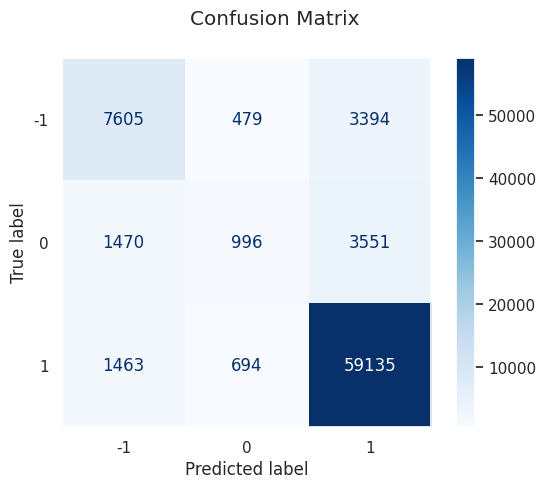

In [ ]:
# Transform the test set text using the fitted vectorizer
x_test_text = vectorizer.transform(cln_df_test['Text'])

# Use the trained model to predict the sentiment on the test set
y_test_predicted = model_baseline.predict(x_test_text)

# Evaluate the model on the test set
evaluate_model(model_baseline, x_test_text, cln_df_test['sentiment'])

## BoW + Logistic Regression + Undersampling (0.70)

Accuracy of f1-score (macro-avg): 0.70

In [ ]:
cln_df_test = test_df[["Text", "sentiment"]].copy()
cln_df_test.dropna(subset=["Text"], inplace=True)
cln_df_test.reset_index(drop=True, inplace=True)
cln_df_test.head(3)

,Text,sentiment
0,I bought these in hopes of finding a healthy a...,0
1,I love this stuff and it's good for you (or at...,1
2,I spent a few weeks in the Southwest on my ann...,1


              precision    recall  f1-score   support

          -1       0.62      0.70      0.66     11478
           0       0.24      0.60      0.34      6017
           1       0.96      0.80      0.87     61292

    accuracy                           0.77     78787
   macro avg       0.61      0.70      0.63     78787
weighted avg       0.86      0.77      0.80     78787



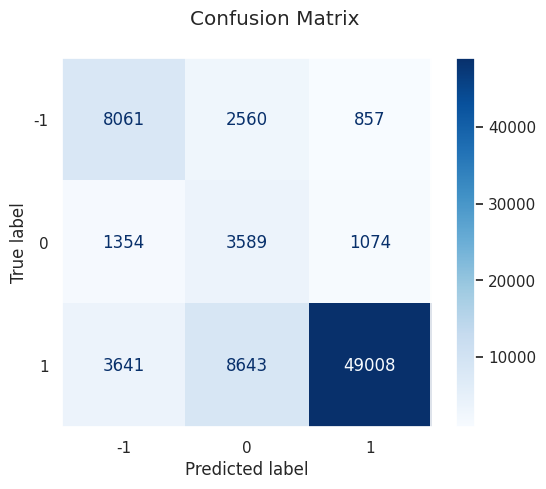

In [ ]:
# Transform the test set text using the fitted vectorizer
x_test_text = vectorizer.transform(cln_df_test['Text'])

# Use the trained model to predict the sentiment on the test set
y_test_predicted = model_undersampling.predict(x_test_text)

evaluate_model(model_undersampling, x_test_text, cln_df_test['sentiment'])

## Fine-tuned DistilBERT

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback

In [ ]:
# Load trained model
model_path = "jhan21/amazon-reviews-distilbert-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=3)

In [ ]:
cln_df_test = test_df[["Text", "sentiment"]].copy()
cln_df_test.dropna(subset=["Text"], inplace=True)
cln_df_test.reset_index(drop=True, inplace=True)
cln_df_test.head(3)

,Text,sentiment
0,I bought these in hopes of finding a healthy a...,0
1,I love this stuff and it's good for you (or at...,1
2,I spent a few weeks in the Southwest on my ann...,1


In [ ]:
x_test = cln_df_test.Text.values.tolist()
y_test = cln_df_test.sentiment.values.tolist()

In [ ]:
# Load pretrained model/tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
x_test_tok = tokenizer(x_test, padding=True, truncation=True, max_length=512)

In [ ]:
# Create torch dataset
test_dataset = Dataset(x_test_tok)

In [ ]:
# Define test trainer
test_trainer = Trainer(model)

In [ ]:
# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred - 1))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred - 1, cmap=plt.cm.Blues)

disp.figure_.suptitle("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
encoded_sentence = tokenizer.encode("The oatmeal is so mushy!", add_special_tokens=True)
preditct = test_trainer.predict(encoded_sentence)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering
import torch
model_path = 'jhan21/amazon-reviews-distilbert-base-sentiment'
tokenizer = DistilBertTokenizer.from_pretrained(model_path)
model = DistilBertForQuestionAnswering.from_pretrained(model_path)

review = "The oatmeal is so mushy!"

inputs = tokenizer(review, padding=True, truncation=True, max_length=512)
# Create torch dataset
test_dataset = Dataset(inputs)

# Define test trainer
test_trainer = Trainer(model)

result = test_trainer.predict(test_dataset)

# Summary

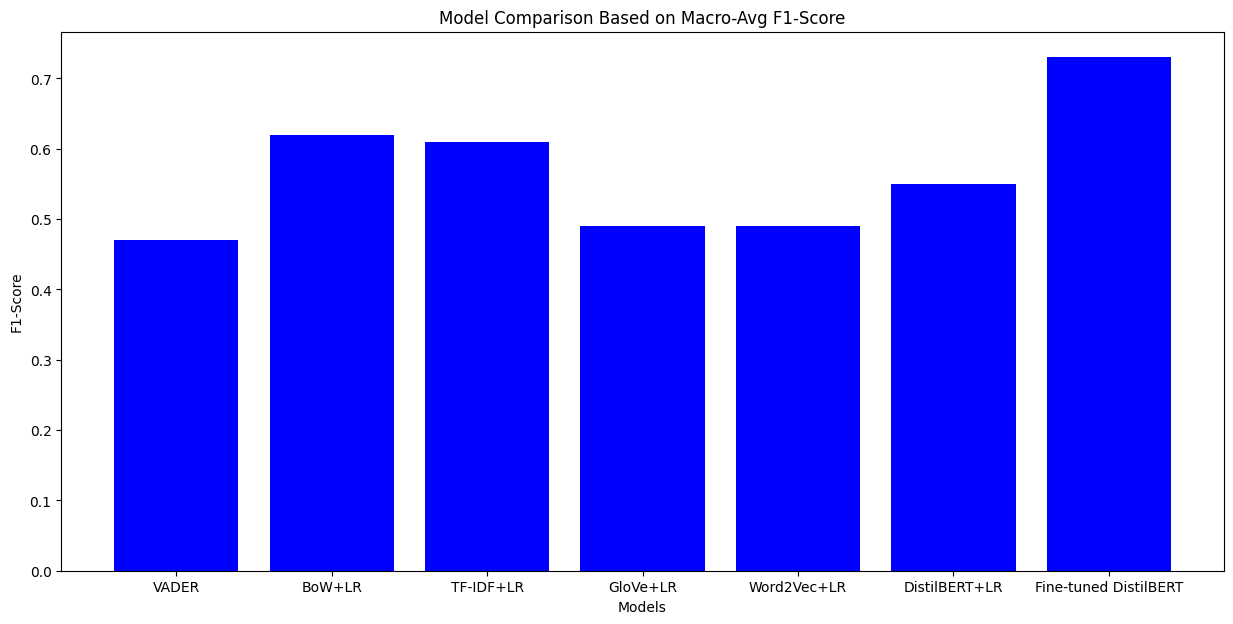

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['VADER', 'BoW+LR', 'TF-IDF+LR', 'GloVe+LR', 'Word2Vec+LR', 'DistilBERT+LR', 'Fine-tuned DistilBERT']

# Replace these values with f1 scores
f1_scores = [0.47, 0.62, 0.61, 0.49, 0.49, 0.55, 0.73]

# Creating the bar chart
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed
plt.bar(models, f1_scores, color='blue')

# Adding titles and labels
plt.title('Model Comparison Based on Macro-Avg F1-Score')
plt.xlabel('Models')
plt.ylabel('F1-Score')

# Show the plot
plt.show()


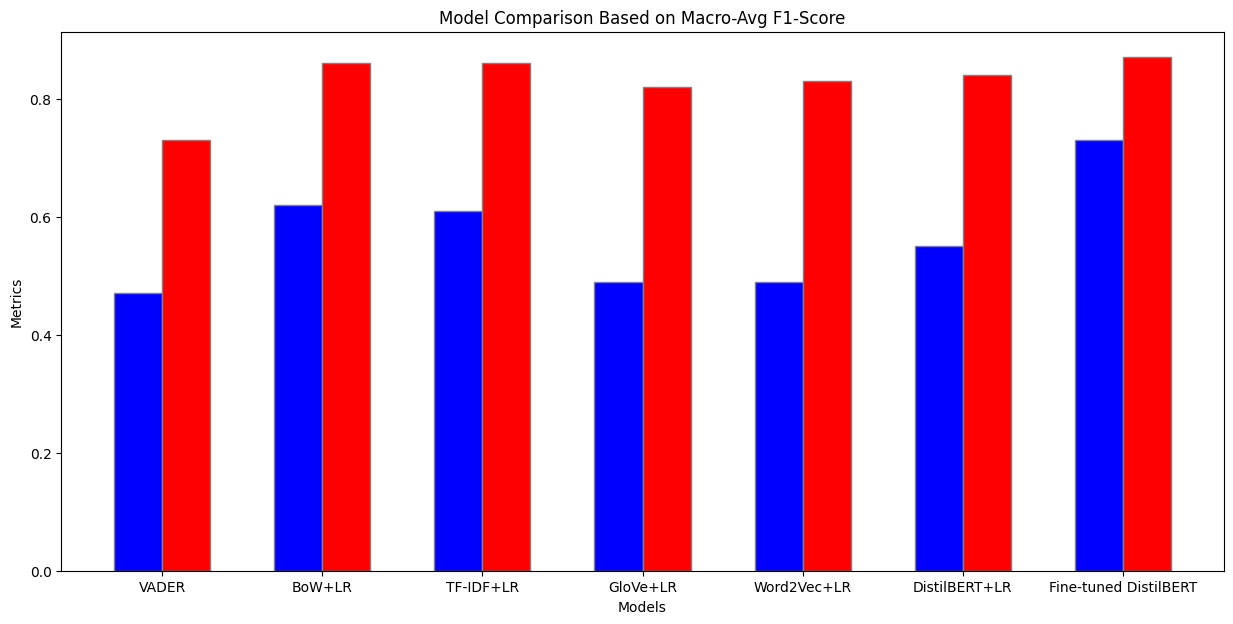

In [ ]:
import numpy as np

# Model names
models = ['VADER', 'BoW+LR', 'TF-IDF+LR', 'GloVe+LR', 'Word2Vec+LR', 'DistilBERT+LR', 'Fine-tuned DistilBERT']

# Replace these values with f1 scores
f1_scores = [0.47, 0.62, 0.61, 0.49, 0.49, 0.55, 0.73]
accuracy = [0.73, 0.86, 0.86, 0.82, 0.83, 0.84, 0.87]

# Set positions of the bars
barWidth = 0.3
r1 = np.arange(len(models))  # Positions of bars for f1_score
r2 = [x + barWidth for x in r1]  # Positions of bars for accuracy

# Creating the bar chart
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed
plt.bar(r1, f1_scores, color='blue', width=barWidth, edgecolor='gray', label='F1-Score')
plt.bar(r2, accuracy, color='red', width=barWidth, edgecolor='gray', label='Accuracy')


# Adding titles and labels
plt.title('Model Comparison Based on Macro-Avg F1-Score')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.xticks([r + barWidth/2 for r in range(len(models))], models)

# Show the plot
plt.show()

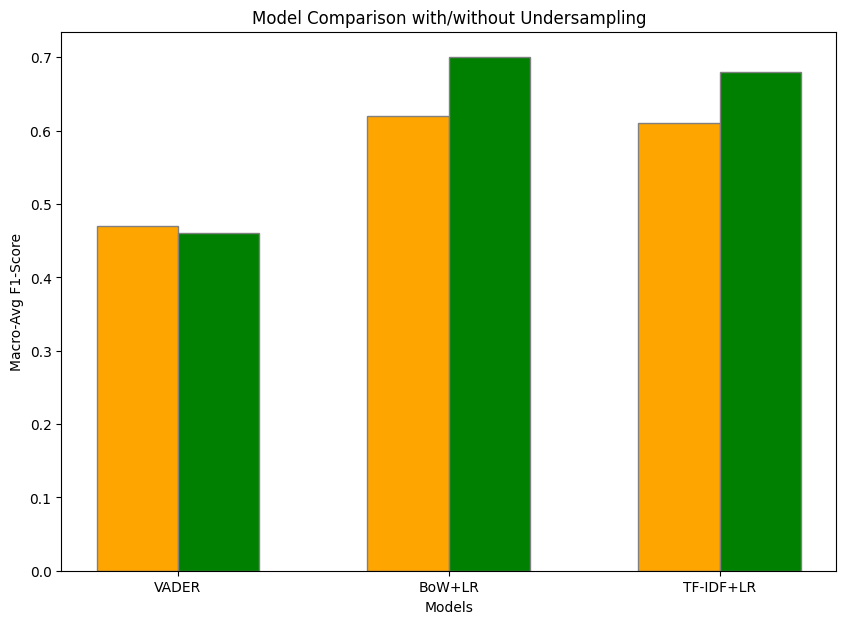

In [ ]:
# Model names
models = ['VADER','BoW+LR', 'TF-IDF+LR']

# Replace these values with f1 scores
f1_scores = [0.47, 0.62, 0.61]
after_us = [0.46, 0.70, 0.68]

# Set positions of the bars
barWidth = 0.3
r1 = np.arange(len(models))  # Positions of bars for accuracy
r2 = [x + barWidth for x in r1]  # Positions of bars for F1-score

# Creating the bar chart
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
plt.bar(r1, f1_scores, color='orange', width=barWidth, edgecolor='gray', label='Before Undersampling')
plt.bar(r2, after_us, color='green', width=barWidth, edgecolor='gray', label='After Undersampling')


# Adding titles and labels
plt.title('Model Comparison with/without Undersampling')
plt.xlabel('Models')
plt.ylabel('Macro-Avg F1-Score')
plt.xticks([r + barWidth/2 for r in range(len(models))], models)

# Show the plot
plt.show()